# Project 1 Programming for Data Analysis Winter 2023 

**Author: Nur Bujang**

project1.ipynb
***

### Project Instruction:

> Using numpy.random package, generate at least one-hundred data points across at least four different variables. Synthesise/simulate a data set as closely matching their properties as possible.

>  Investigate the types of variables involved, their likely distributions, and their relationships with each other. Figure out what the variable should look like, the type of distribution for each, and relationship between the variable (what is the reasonable model of the real-world phenomenon, and how it would be distributed).

> Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

> The README need only contain an explanation of what is contained in the repository and how to run the Jupyter notebook. 

> The notebook should contain the main body of work and should list all references used in completing the project.

## **Project Title: Optimization of Recombinant CHO Cell Culture in a Miniature Bioreactor Model**

### Project Description

The goal of this project is to use data analysis and machine learning techniques to simulate a real-world suation in the biopharmaceutical industry, where recombinant Chinese Hamster Ovary cells containing monoclonal antibodies are being grown under controlled conditions in bioreactors. Hypothetically, through a simulation study, if a problem occurs within the controlled conditions, the user will be able to minimize the damage/loss quickly with strategically-guided decisions, thus, preventing a waste of resources and maximizing profit.

The dataset comprises of four independent variables (temperature, dissolved oxygen, glucose concentration and lactate concentration) to determine the optimum conditions for growing recombinant CHO cells. The dependent variable is the final viable cell density. The variables were randomly generated using  numpy.random package. However, the values and distributions were pre-determined from experimental results in peer-reviewed journal articles.

The relationship between these variables were then studied. Results show that

## Background

### Monoclonal Antibodies

Monoclonal antibodies (mAbs) are the most profitable therapeutic proteins on the market (Ho et al., 2013). Some examples of mAbs are DARZALEX® (daratumumab) by Johnson & Johnson for multiple myeloma (Content Lab U.S., 2015), ZIRABEV™ (bevacizumab-bvzr), RUXIENCE™ (rituximab-pvvr) and TRAZIMERA™ (trastuzumab-qyyp) by Pfizer for cancer (www.pfizer.com, 2020) and  KEYTRUDA® (pembrolizumab) by Merck Sharp & Dohme (MSD) for cancer treatment (MSD Connect UK, 2022). MAbs are highly specific and each only binds to a specific protein on a cell (www.cancerresearchuk.org, 2021). Depending on the target protein, it will either attack cancer cells directly, flag cancer cells for destruction by the body's immune system or deliver toxins straight to cancer cells (Mayo Clinic, 2019, Malik and Ghatol, 2023). Patient therapy requires high doses of mAbs over a long period of time, thus increasing its market demand constantly (Li et al., 2004).

![Structure of monoclonal antibody and its components,  Dabhadkar, Palekar and Pawar (2022)](https://www.researchgate.net/publication/366690611/figure/fig1/AS:11431281110227336@1672404820275/Structure-of-monoclonal-antibody-and-its-components-Structure-of-monoclonal-antibodies.png)

### Monoclonal Antibody Production Technologies

According to Schofield (2023), current commercial mAb manufacturing methods are hybridoma technique, phage display, single B cell technology and recombinant DNA technology, with the latter being the most popular. Recombinant monoclonal antibody mass-production involves inserting select functional gene regions into expression vector into mammalian or bacterial cell cultures (Schofield, 2023). 

Recently, DeLuca, Mick and DeLuca (2022) reported a method to produce recombinant monoclonal antibodies from human cells at a considerably low cost. However, currently, the currently preferred host for recombinant mAb production are Chinese Hamster Ovary (CHO cells) mammalian cells due to their ability to produce complex proteins with post-translational modifications, high productivity and ease-of-use in large scale cell culture (Eberle, 2023). 

![Cytocentered Chinese hamster ovary (CHO) cell ,  Stett et al. (2003)](https://www.researchgate.net/profile/Alfred-Stett/publication/6895082/figure/fig2/AS:280362598060032@1443855060170/Cytocentered-Chinese-hamster-ovary-CHO-cell-placed-on-a-suction-opening-with-12-m-m.png)

### Large-Scale Recombinant Monoclonal Antibody Manufacturing Process

According to Vázquez-Rey and Lang (2011), a standard recombinant mAb manufacturing process using mammalian cell culture includes growing seed culture (inoculum) in fermentation tanks, followed by large-scale production of up to 20,000 L in bioreactors, cell harvest/primary recovery, product purification and finally product formulation. 

Because of the increasing demand in human and animal therapy, new strategies and technologies are continually being developed to maximize cell culture productivity (Rodrigues et al., 2009, Singh et al., 2015, Kunert and Reinhart, 2016). This includes upgraded bioreactors with higher capacities (Rodrigues et al., 2009), disposable bioreactors (Zhao et al., 2014) and advances in proteomics to produce high quality mAbs (Steinhoff et al., 2016, Jyothilekshmi and Jayaprakash, 2021). 

### Optimization of CHO Cell Culture Conditions in Bioreactors

According to Rodrigues et al. (2009), factors that affect cell production are temperature, pH, osmolality, dissolved oxygen, carbon dioxide (CO<sub>2</sub>), nutrient and metabolites concentration. Optimized temperature, pH, dissolved oxygen, CO<sub>2</sub> and nutrient and metabolites concentration are growth factors for CHO cells while high osmolality and lactate inhibit cell growth. Attributes of specific protein productivity include cell size, cell volume and viable cell density (Alhuthali, Kotidis and Kontoravdi, 2021). 

It is crucial for these culture conditions to be optimized to maintain a consistent glycosylation profile, which is a critical protein quality trait to ensure proper protein conformation and maintain product integrity and efficacy (Masayoshi Onitsuka et al., 2014, Jennewein and Alter, 2017, Li et al., 2010, 2019, 2022, Reddy et al., 2023).

![Industrial bioreactors ,  Pharmaceutical Technology (2003)](https://www.pharmaceutical-technology.com/wp-content/uploads/sites/24/2017/09/CHUGAI-1.jpg)

### Factors Affecting CHO Cell Growth

While Li et al. (2022) stressed the importance of optimization throughout all stages of genetic modification, expression vector, cell line modification finally production process in recombinant protein production, in this study, I will only focus on the optimization of cell growth conditions in a miniature bioreactor model. For this purpose, I will select four major determinants in cell growth; temperature, dissolved oxygen, glucose concentration and lactate concentration. The dependent variable is final viable cell density (VCD). 

#### **Temperature**

ALthough CHO cells are usually grown at 37°C (Becerra et al., 2012, Xu et al., 2019),  temperature shift (TS) to a hypothermic condition of 25–35°C have been shown to produce cell growth (Al-Fageeh et al., 2006). Sunley, Tharmalingam and Butler (2008) reported a CHO cell population which has adapted to growing at 32°C for 300 days while maintaining high level of cell-specific recombinant protein. Fan et al. (2010) and Kou et al. (2011) reported 3-fold and 5-fold increase of mAb productivity at  30°C compared to that of 37°C. Meanwhile, Jenkins and Hovey (1993) reported significantly increased protein yield from CHO cells at alternating temperatures between 34°C and 39°C. 

#### **Dissolved Oxygen**

According to Zakrzewski, Lee and Lye (2022), fluctuations in dissolved oxygen (DO) tension between 10%–30% decreased cell growth by 35%. Fluctuations in DO resulted in increased lactate accumulation (Hippach et al., 2018). Restelli et al. (2006) found that under hyperoxic condition of 200% DO, the final viable cell yield was significantly lower than normoxic condition at 50% DO. 

#### **Glucose Concentration**

Dowd, Kwok and Piret (2001) and Meuwly et al. (2006b) proposed the use of glucose consumption rate (GCR) as a process monitoring tool to indicate medium utilization in cell cultures in bioreactors. López-Meza et al., (2016) found that recombinant CHO cells did not exhibit a lag-phase even at the lowest glucose concentration. Vergara et al. (2018) later reported that high feed glucose limits cell growth, but improves specific protein productivity in CHO cells significantly. Hence, it is important to find the right balance during the optimization process of recombinant cell production.

#### **Lactate Concentration**

While lactate is a waste product of cell growth and high levels of lactate has negative effects on cell growth (Zhou et al., 2011), Li et al. (2011) found that incorporating lactate in the culture medium could be beneficial in minimizing ammonia accumulation, thus improving cell culture performance. Zagari et al. (2013) reported that high lactate reduces mitochondrial oxidative metabolism in cells. According to Martínez-Monge et al. (2019), CHO cells can metabolize both glucose and lactate during the growth phase. The lactate metabolic shift from lactate production to consumption does not happen in cultures with elevated CO<sub>2</sub> pressure (Brunner et al., 2018).

## Methods and Implementation

1. First, I created assumptions for the study:

* I focused on growing CHO cells in a miniature bioreactor model. Growing cells in large-scale bioreactors usually takes 2-3 weeks (Xu et al., 2019).

* The final cell density reading sample is taken at the deceleration phase in a Standard Growth Curve of cell culture.

![Standard Growth Curve,  Bhatia (2015)](https://ars.els-cdn.com/content/image/3-s2.0-B9780128022214000029-f02-09-9780128022214.jpg)

2. Then, I created Table 1 containing results from past CHO cell culture experiments under various conditions to determine the range for random number generator. 

#### Table 1: Variables (in unit measurement) involved in recombinant CHO cell culture 

| **Temperature (°C)**| **Dissolved Oxygen (%)** | **Glucose Concentration (g/L)** | **Lactate Concentration (g/L)** | **Final Viable Cell Density (FVCD) (x10<sup>6</sup>/ml)** | **Source** |
| :-------: | :------: | :------: | :------: | :------: | :------: | 
| 37    |    |   | 9.58 |  2.2  | Vergara et al. (2014) |
| 33    |    |   | 9.8 | 2.1  | Vergara et al. (2014) |
| 37    |  50 |    7.2      |    5.8      |     25     | Siddiquee et al. (2019)|
| 37    |  30 |     8     |    6      |    35      | Siddiquee et al. (2019)|
| 32    |  50 |     8.2     |    1.1     |     70     | Siddiquee et al. (2019)|
| 32    |  30 |      6    |     3     |     50     | Siddiquee et al. (2019)|
| 35.5  |  50    |    |   6.5  |     62  | Zakrzewski, Lee and Lye (2022) |
| 35.5  |    30  |    |  7.5   |   41  | Zakrzewski, Lee and Lye (2022) |
| 37    | 3  |    |          |  1.5 | Restelli et al. (2006) |
| 37    | 10 |    |          |  1.4 | Restelli et al. (2006)|
| 37    | 50 |    |          |  1.5 | Restelli et al. (2006) |
| 37   | 100 |    |          |  1.1 | Restelli et al. (2006)|
| 37   | 200 |    |          |   1.15| Restelli et al. (2006)|
| 36.5 |  10 |  12.5  |  4.5 |  8 | Hippach et al. (2018)|
| 36.5 |  20 |  12.5  | 4.3  |   17| Hippach et al. (2018)|
| 36.5 |  44 |  12.5  |  1.6 |  16 | Hippach et al. (2018) |
| 36.5 | 60  |  12.5  | 1.4  |  16.5| Hippach et al. (2018)|
| 32|          |4.5 |  2.5 | 15 | Xu et al. (2019)|
| 34|          | 2.5 |  2.2 |  45   | Xu et al. (2019) |
| 36.5|          | 1 |  0.75 |  52  | Xu et al. (2019) |
| 37.5|          |  1.8 |  2.7 |7.5 | Xu et al. (2019)|
| 38.5|          |  1.9 |  2.5 |6.75  | Xu et al. (2019) |
| 32 | 40 |          | 0.9  | 22 |  McHugh et al. (2020) |
| 37 |          |          |  1.35 | 1.15 | Tang et al. (2020) |
| 37 | 30 |  6 | 4.2 |  7.5 | Li et al. (2011)|
| 30 | 50 |          |          |  0.5 | Kou et al. (2011) |
| 37 | 50 |          |          |  4 | Kou et al. (2011) |
| 37   | 65 | 1.98 | 1.51 |  11 |  Zagari et al. (2013)|
| 37   | 65 | 1.8 | 2.18 |  9.7 |  Zagari et al. (2013)|
| 37   | 65 | 5.04 | 0.68 | 12.5  |  Zagari et al. (2013)|
| 37   | 65 | 3.51 |1.78 | 10.5  |  Zagari et al. (2013)|
| 37   | 65 | 1.8  | 0.65 | 10  |  Zagari et al. (2013)|
| 37 | 10 |          | 4.95 | 10.5 | Brunner et al. (2018) |
| 37 | 25 |          | 3.43 | 14.5 | Brunner et al. (2018) |
| 36.5 | 25 |          | 1.35 | 8.8| Brunner et al. (2018) |
| 36.5 | 40 |          | 2.25 | 9.0 | Brunner et al. (2018) |
| 36.6  | 68   | 3.6| 7.2 | 28 | Okamura et al. (2022)|
| 35.6  | 56.5 | 3.96 | 0.9 | 25 | Okamura et al. (2022)|
| 37 |          | 6.85 | 0.16 |  8.8 | Martínez-Monge et al. (2019) |
| 37 | 50 |  0.7 | 1.8 | 1.45 | Ozturk et al. (1997) |
| 32|   |          |          | 5.77 | Sunley, Tharmalingam and Butler (2008)|
| 33 |          | 3.6 | 0.90 | 1.51 | Vergara et al. (2018) |
| 33 |          | 5.4 | 0.54 | 1.10 | Vergara et al. (2018) |
| 33 |          | 7.2 | 0.26 | 0.88 | Vergara et al. (2018) |
| 37 |          | 3.6 | 0.99 | 1.65 | Vergara et al. (2018) |
| 37 |          | 5.4 | 0.78 | 1.01 | Vergara et al. (2018) |
| 37 |          | 7.2 | 0.57 | 0.80 | Vergara et al. (2018) |
| 33   |          |  4.8 |  0.97 |  6.8 | López-Meza et al., (2016) |
| 33   |          |  3.6 |  0.57 |  5.5 | López-Meza et al., (2016) |
| 33   |          |  2.4 |  0.2  |  3   | López-Meza et al., (2016) |
| 33   |          |  1.2 |  0 |  1.1 | López-Meza et al., (2016) |
| 37 | 32.5 |          |  13 |   25 | Gagnon et al. (2011)|
| 37 |          | 1.35 |  2.16 | 7 | Pérez-Rodriguez et al. (2020) | 
| 37 | 45 | 3.0 | 5.7  | 20 | Huang et al. (2020)|
| 33.5 | 75 |  1.5 |  2.5 | 61 | Meuwly et al. (2006a) |
| 37 | 50 |   |   | 11.75 | Nienow et al. (2013)|
| 37 | 40 | 3.06  | 4.9  | 16.67 | Domján et al. (2022) |
| 36.5 |  |   | 1.45  | 8.25 | Gibbons et al. (2023) |
| 36.5 |  |   | 1.15  | 8.75 | Gibbons et al. (2023) |
| 36.5 |  |   |  1.3 | 8 | Gibbons et al. (2023) |
| 36.5 |  |   | 1.9  | 10.75 | Gibbons et al. (2023) |
| 36.5 |  |   |  1.7 | 10.2 | Gibbons et al. (2023) |
| 36.5 |  |   |  2.4 | 10.5 | Gibbons et al. (2023) |
| 37 | 50 | 0.01  | 1.51  | 8.3 | Li et al. (2018b) |
| 37 | 50 | 0.01  | 1.56  | 7.4 | Li et al. (2018a) |
| 37 | 50 | 2.25  | 1.46  | 5.5 | Whelan, Craven and Glennon (2012) |
| 37 | 50 | 3.06  |  1.35 | 4.8 | Whelan, Craven and Glennon (2012) |
| 37 | 50 |  0.01 |  1.56 | 8.5 | Zavala-Ortiz et al. (2019) |
| 37 | 50 |  0.01 |  1.5 | 8.5 | Zavala-Ortiz et al. (2019) |
| 37 | 50 |  0.36 |1.62  | 7.3 | Zavala-Ortiz et al. (2019) |

3. Then, I saved Table 1 in a .csv file named chori.csv. The table contains 5 columns (temp, oxygen, glucose, lactate and fvcd) and 70 rows of data with missing values.  

4. I imported Python libraries numpy for computational operations and pandas for data loading from other sources and processing.

In [3]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from distfit import distfit
from scipy.stats import loggamma
from scipy.stats import dweibull
from scipy.stats import genextreme

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

5. I imported the dataset in chorimil.csv in the repository and performed df.head to show the default first few lines of the dataframe.

In [4]:
df = pd.read_csv('chorimil.csv')
df.head() # default is 5 rows

,temp,oxygen,glucose,lactate,fvcd
0,37.0,NaN,NaN,9.58,2200000
1,33.0,NaN,NaN,9.80,2100000
2,37.0,50.0,7.2,5.80,25000000
3,37.0,30.0,8.0,6.00,35000000
4,32.0,50.0,8.2,1.10,70000000


I executed df.info() (Ranjan, 2018) to give an output containing the number of rows and columns, column names and their data types and the number of non-null (not missing) values of each column. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   temp     70 non-null     float64
 1   oxygen   43 non-null     float64
 2   glucose  44 non-null     float64
 3   lactate  61 non-null     float64
 4   fvcd     70 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 2.9 KB


Output shows that all independent columns are 64-bit floating-point numbers. It is a continuous data type, which is a type of quantitative data. 

The dependent column (fvcd) is the 64-bit signed integer datatype, which represents whole numbers. Integers are discrete data (not continuous), subdivision is impossible and is also a type of quantitative data (Great Learning Team, 2023)

Then, I executed df.describe (Pandas.pydata.org, n.d.) to generate basic statistical information of each column in the dataset.

In [6]:
df.describe()

,temp,oxygen,glucose,lactate,fvcd
count,70.000000,43.000000,44.000000,61.000000,7.000000e+01
mean,35.860000,48.813953,4.212727,2.647869,1.356986e+07
std,1.882983,30.308733,3.497000,2.618894,1.578852e+07
min,30.000000,3.000000,0.010000,0.000000,5.000000e+05
25%,35.525000,31.250000,1.800000,0.990000,3.250000e+06
50%,37.000000,50.000000,3.555000,1.600000,8.500000e+06
75%,37.000000,53.250000,6.000000,3.000000,1.575000e+07
max,38.500000,200.000000,12.500000,13.000000,7.000000e+07


For a quick look at the distribution, I imported matplotlib and seaborn to visualize plots for each variable. To plot multiple subplots in one output, I used Bruno (2020) and Matplotlib.pyplot.subplots (n.d.). 

I also used distfit (Taskesen, 2020b) for hypothesis testing and to find the best probability distribution to model each variable, as shown in Malloy (2023), Mayo (2022) and Raoniar (2022). 

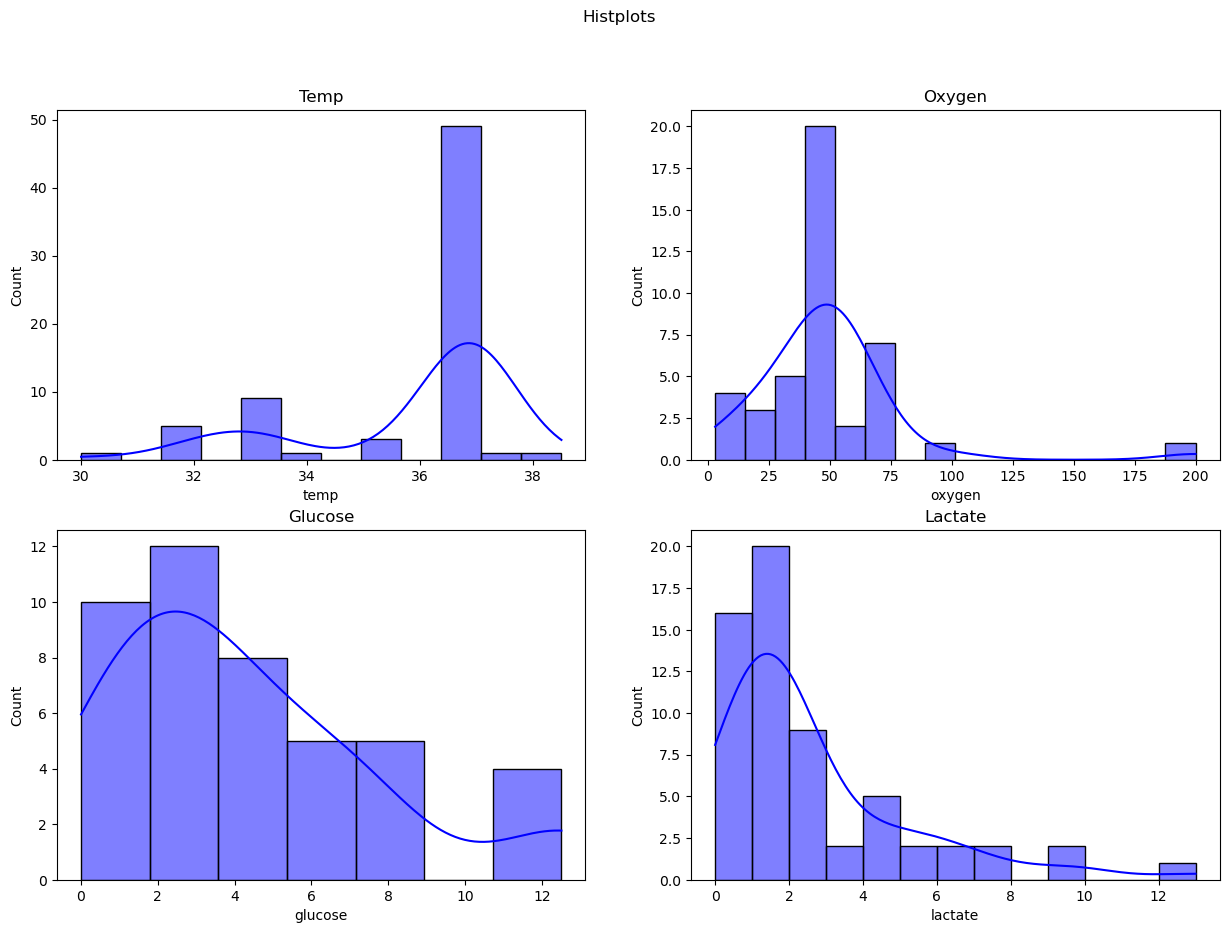

In [7]:
# For the independent variables: 

fig, axs = plt.subplots(2, 2, figsize=[15, 10])
fig.suptitle('Histplots')

sns.histplot(df['temp'], 
             kde=True, color='blue', label='Data', 
             ax=axs[0,0]
             )
axs[0,0].set_title('Temp')

sns.histplot(df['oxygen'], 
             kde=True, color='blue', label='Data', 
             ax=axs[0,1]
             )
axs[0,1].set_title('Oxygen')

sns.histplot(df['glucose'], 
             kde=True, color='blue', label='Data', 
             ax=axs[1,0]
             )
axs[1,0].set_title('Glucose')

sns.histplot(df['lactate'], 
             kde=True, color='blue', label='Data', 
             ax=axs[1,1]
             )
axs[1,1].set_title('Lactate');

In [8]:
dists = {} # create a list of columns

for c in df.columns:
    print(c)
    dists[c] = {'fit' : distfit() } # Initialize distfit
    dists[c]['fit'].fit_transform(df[c].dropna().values) # Fit distributions on empirical temp, after dropping missing values
    dists[c]['fit'].predict(df[c].dropna().values) # Predict the probability of the response variables

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.783134] [loc=35.860 scale=1.869]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.948188] [loc=30.000 scale=5.860]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.948188] [loc=-536870882.000 scale=536870912.000]
[distfit] >INFO> [dweibull  ] [0.03 sec] [RSS: 0.788531] [loc=37.000 scale=1.326]


temp


[distfit] >INFO> [t         ] [0.18 sec] [RSS: 0.780162] [loc=35.888 scale=1.836]
[distfit] >INFO> [genextreme] [0.03 sec] [RSS: 0.722435] [loc=35.538 scale=1.930]
[distfit] >INFO> [gamma     ] [0.04 sec] [RSS: 0.795752] [loc=5.315 scale=0.123]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 0.783135] [loc=-524258.000 scale=524293.860]
[distfit] >INFO> [beta      ] [0.05 sec] [RSS: 0.933302] [loc=29.036 scale=9.464]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.858922] [loc=30.000 scale=8.500]
[distfit] >INFO> [loggamma  ] [0.01 sec] [RSS: 0.60393] [loc=37.526 scale=0.502]
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.000768334] [loc=48.814 scale=29.954]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.00117616] [loc=3.000 scale=45.814]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.00117616] [loc=-8589934589.000 scale=8589934592.000]
[distfit] >INFO> [dweibull  ] [0.04 sec] [RSS: 0.000492482] [loc=50.000 scale=20.512]


oxygen


[distfit] >INFO> [t         ] [0.17 sec] [RSS: 0.00078493] [loc=49.633 scale=30.034]
[distfit] >INFO> [genextreme] [0.11 sec] [RSS: 0.000723832] [loc=36.694 scale=20.926]
[distfit] >INFO> [gamma     ] [0.03 sec] [RSS: 0.000732022] [loc=-10.112 scale=12.138]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 0.000715069] [loc=-30.166 scale=74.691]
[distfit] >INFO> [beta      ] [0.06 sec] [RSS: 0.000733945] [loc=-9.780 scale=22957440890507.312]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.00138934] [loc=3.000 scale=197.000]
[distfit] >INFO> [loggamma  ] [0.04 sec] [RSS: 0.000782758] [loc=-7534.008 scale=1066.847]
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.00905645] [loc=4.213 scale=3.457]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.0080698] [loc=0.010 scale=4.203]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.0451111] [loc=0.010 scale=0.000]
[distfit] >INFO> [dweibull  ] [0.01 sec] [RSS: 0.00574846] [loc=3.347 scale=2.731]
[di

glucose


[distfit] >INFO> [beta      ] [0.05 sec] [RSS: 0.0206351] [loc=0.010 scale=14.170]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.0158071] [loc=0.010 scale=12.490]
[distfit] >INFO> [loggamma  ] [0.04 sec] [RSS: 0.00921095] [loc=-1109.322 scale=148.364]
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.0773511] [loc=2.648 scale=2.597]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.0215094] [loc=0.000 scale=2.648]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.0215094] [loc=-67108864.000 scale=67108864.000]
[distfit] >INFO> [dweibull  ] [0.02 sec] [RSS: 0.125068] [loc=1.460 scale=1.261]
[distfit] >INFO> [t         ] [0.06 sec] [RSS: 0.0229327] [loc=1.513 scale=0.810]
[distfit] >INFO> [genextreme] [0.03 sec] [RSS: 0.00736499] [loc=1.334 scale=1.138]
[distfit] >INFO> [gamma     ] [0.01 sec] [RSS: 0.0176416] [loc=-0.015 scale=2.135]
[distfit] >INFO> [lognorm   ] [0.03 sec] [RSS: 0.203397] [loc=-0.000 scale=0.000]


lactate


[distfit] >INFO> [beta      ] [0.07 sec] [RSS: 0.0338282] [loc=-0.000 scale=14.825]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.133504] [loc=0.000 scale=13.000]
[distfit] >INFO> [loggamma  ] [0.04 sec] [RSS: 0.0789319] [loc=-885.877 scale=117.682]
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 3.49603e-15] [loc=13569857.143 scale=15675334.263]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 8.80599e-16] [loc=500000.000 scale=13069857.143]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 1.02676e-15] [loc=-39825543.898 scale=40325543.898]
[distfit] >INFO> [dweibull  ] [0.04 sec] [RSS: 1.06385e-15] [loc=8300000.000 scale=7793127.022]
[distfit] >INFO> [t         ] [0.12 sec] [RSS: 2.61851e-15] [loc=-21998.777 scale=10074853.333]


fvcd


[distfit] >INFO> [genextreme] [0.13 sec] [RSS: 6.8234e-15] [loc=500001.301 scale=14.953]
[distfit] >INFO> [gamma     ] [0.04 sec] [RSS: 1.15417e-15] [loc=500000.000 scale=17237035.380]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 1.63902e-15] [loc=221534.002 scale=6762861.399]
[distfit] >INFO> [beta      ] [0.06 sec] [RSS: 2.20438e-15] [loc=500000.000 scale=103257776.505]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 5.33982e-15] [loc=500000.000 scale=69500000.000]
[distfit] >INFO> [loggamma  ] [0.04 sec] [RSS: 3.61018e-15] [loc=-4988777860.666 scale=675522111.581]


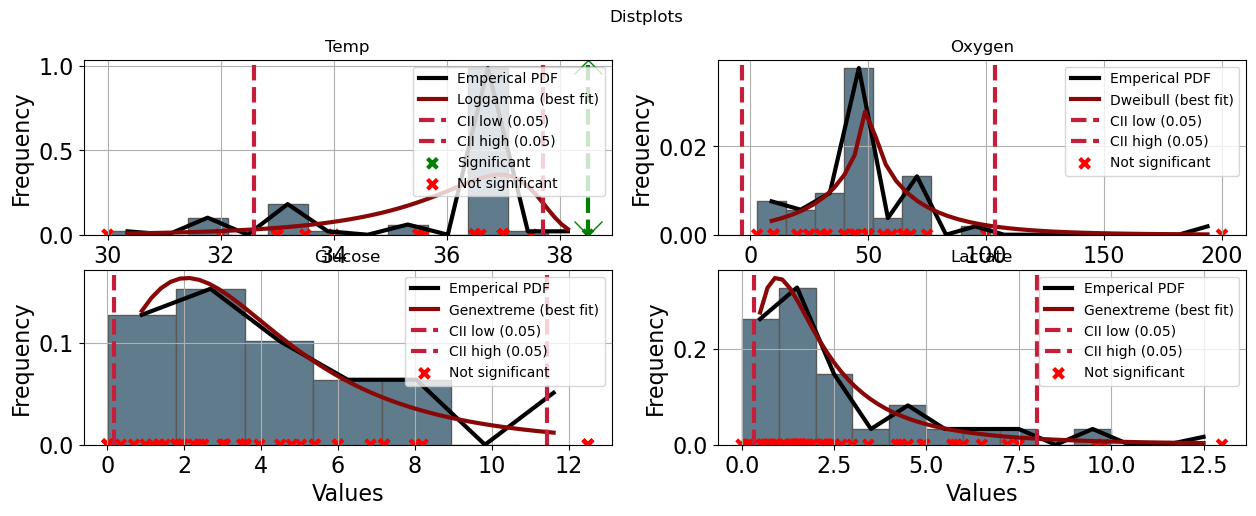

In [9]:
fig, axs = plt.subplots(2, 2, figsize=[15, 5])
fig.suptitle('Distplots')

dists['temp']['fit'].plot(ax=axs[0,0])
axs[0,0].set_title('Temp')

dists['oxygen']['fit'].plot(ax=axs[0,1])
axs[0,1].set_title('Oxygen')

dists['glucose']['fit'].plot(ax=axs[1,0])
axs[1,0].set_title('Glucose')

dists['lactate']['fit'].plot(ax=axs[1,1])
axs[1,1].set_title('Lactate');

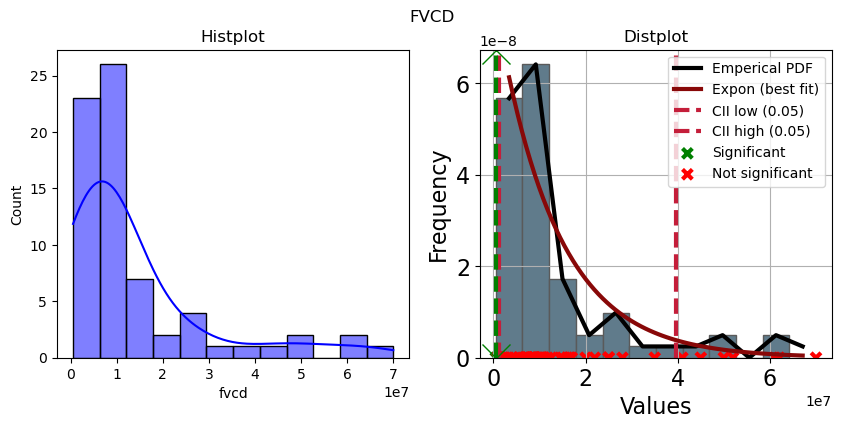

In [10]:
# For the dependent variable fvcd:

fig, axs = plt.subplots(1, 2, figsize=[10, 4])
fig.suptitle('FVCD')

sns.histplot(df['fvcd'], 
             kde=True, color='blue', label='Data', 
             ax=axs[0]
             )

#dists['temp']['fit'].plot(ax=axs[0])
axs[0].set_title('Histplot')

dists['fvcd']['fit'].plot(ax=axs[1])
axs[1].set_title('Distplot');

The probability distribution for all five columns are summarized in Table 2.

#### Table 2: Probability Distribution for Five Variables 

| **Column**| **Probability Distribution** | 
| :-------: | :------: |
| temp   | Log Gamma   |
| oxygen    |  Double Weibull  |
| glucose    |  Generalized Extreme Value  |
| lactate    |  Generalized Extreme Value |
| fvcd    |  Exponential |

### Column temp

Although the RSS (Residual Sum of Squares, or Sum of Squared Errors , SSE) goodness of fit values are not significant (over 0.05), the best fitting probability distribution is Log Gamma distribution for column temp. Because it is not available in the numpy random package, I used scipy to generate random numbers (Scipy.stats.loggamma, n.d., GeeksforGeeks, 2019, www.tutorialandexample.com, 2023). According to Chan (1993), Log Gamma distribution gets more skewed to the right as the shape parameter gets bigger. In this case, it is positively skewed towards the warmer temperatures. Log Gamma distribution have applications in survival data analysis (SciSpace - Question, n.d.).

According to Scipy.stats.loggamma (n.d.), the Log Gamma probability density is as follows:

![Log gamma Distribution](loggamma.png)

First, I imported the loggamma object (Scipy.stats.loggamma, n.d.) and specified the loggamma model in column temp (Taskesen, 2020a). The relevant parameters to fit into Scipy.stats.loggamma (n.d.) for random variates are c, loc and scale. I seeded the scipy random generator according to Kelsey (2013) and Numpy.org random.seed (n.d.).

In [11]:
dists['temp']['fit'].model

{'name': 'loggamma',
 'score': 0.6039295419116101,
 'loc': 37.52586133394318,
 'scale': 0.5017162469149693,
 'arg': (0.315590050551977,),
 'params': (0.315590050551977, 37.52586133394318, 0.5017162469149693),
 'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7f9e7c347c10>,
 'bootstrap_score': 0,
 'bootstrap_pass': None,
 'color': '#e41a1c',
 'CII_min_alpha': 32.587401416831185,
 'CII_max_alpha': 37.701857220729636}

In [12]:
np.random.seed(seed=42)
templg = loggamma.rvs(c=0.316, loc=37.526 , scale=0.502, size=200, ) # c is the shape parameter

templg

array([37.29996161, 35.89269849, 33.44936266, 36.99319652, 37.23304841,
       36.50072511, 37.1022683 , 34.28030657, 36.51027914, 28.85036388,
       35.68617554, 33.09807271, 34.73665327, 33.99695677, 36.52645906,
       37.10695862, 36.32129582, 37.30049134, 35.95167055, 34.86511654,
       37.66118249, 34.34167689, 37.55422719, 30.84539608, 37.55301016,
       32.46474346, 37.1733702 , 36.24829375, 37.96405205, 33.53238409,
       36.36974531, 37.07872044, 36.76951663, 37.22996626, 37.35120909,
       35.76533116, 36.61171922, 36.3990391 , 37.2548064 , 32.97025668,
       36.06627981, 37.60925346, 36.96430316, 36.25029944, 37.39478749,
       35.52349991, 34.7036008 , 36.18077772, 36.03539425, 36.1840418 ,
       33.18090338, 37.88016097, 37.65307095, 36.99480399, 36.95144047,
       35.24871011, 37.01409075, 37.05852376, 34.75845912, 36.39593698,
       36.97719541, 37.35142815, 37.19978575, 36.86593295, 36.09426499,
       35.846043  , 37.27529895, 32.6287    , 32.6503047 , 35.86

### Column oxygen

The best-fitting distribution for column oxygen is the double Weibull distribution at the lowest RSS = 0.000492482. The double Weibull distribution can be left- or right-skewed (Son and Woo, 2009). Among its application are as a survival model for bacterial inactivation studies (Hwang et al., 2019, Hwang, Park and Chung, 2023) and modelling acoustics (Chen et al., 2010). 

According to scipy.stats.dweibull (n.d.), the double Weibull probability density is as follows:

![Double Weibull Distribution](dweibull.png)

Because double Weibull is not available in the numpy random package, I used the dweibull object imported from Scipy.stats.dweibull (n.d.). Then, I specifed the double Weibull model in column oxygen (Taskesen, 2020a) to get the relevant parameters to fit Scipy.stats.dweibull (n.d.) for random variates, which requires c, loc and scale. I also seeded the scipy random generator according to Kelsey (2013) and Numpy.org random.seed (n.d.).

In [13]:
dists['oxygen']['fit'].model

{'name': 'dweibull',
 'score': 0.0004924823692998921,
 'loc': 50.00000000000001,
 'scale': 20.51240463160152,
 'arg': (0.8685664027941592,),
 'params': (0.8685664027941592, 50.00000000000001, 20.51240463160152),
 'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7f9e7c512310>,
 'bootstrap_score': 0,
 'bootstrap_pass': None,
 'color': '#e41a1c',
 'CII_min_alpha': -3.5850486714094743,
 'CII_max_alpha': 103.58504867140948}

In [14]:
np.random.seed(seed=42)
oxygendw = dweibull.rvs(c=0.869, loc=50.000, scale=20.512, size=200) # c is the shape parameter

oxygendw

array([ 28.84203761,  51.24956338,  52.78367144, 103.17428321,
        31.07315489,  49.90646206,  48.43303653,  72.63040275,
        50.04693402,  52.76590118,  34.23136216,  74.75071419,
        71.8260336 ,  45.7633464 ,  23.59468055,  45.43780923,
        42.98443277,  79.5255638 ,  28.33256072,   7.27689182,
        72.21608581,  33.21586717,  48.57773338,  41.64004957,
        44.70679682,  54.73468229, -39.92447408,  59.22541173,
       101.51506846,  29.55090689,  84.81935635,  36.4282284 ,
        32.75263229,  63.12236656,  53.53944407,  77.29399266,
        44.28128524,  49.71112196,  71.38702302,  46.87502545,
       -17.65862729, -24.78441132,  -7.88797273,  58.44123961,
        49.82938291, 112.56331169,  39.49762626, 133.89383612,
       131.42592695,   6.61538772,  56.10371881,  58.94757681,
        93.05512718,  56.76005213,  52.95559469,  66.1807154 ,
       -15.73614479,  24.92216001,  33.12230087,  48.51312832,
        30.55753682, -69.07546137,  52.32784726,  35.70

### Column glucose

<!-- The Generalized Extreme Value (GEV) distribution is unavailable in the numpy random package. It combines Gumbel, Fréchet and Weibull distributions within the extreme value theory (Wikipedia, 2023). According to Numpy.random.gumbel (n.d.), The Gumbel (Smallest Extreme Value (SEV)) is a type of GEV distribution used to model extreme values. It has been used to model environmental data such as wind velocity (Gómez, Heleno Bolfarine and Gómez, 2019) and flood frequency (Evin, Merleau and Perreault, 2011). Therefore, Gumbel distribution will be used to model glucose.

According to Numpy.random.gumbel (n.d.), the Gumbel probability formula is:

![Gumbel Distribution PDF](gumbel.png) -->


The Generalized Extreme Value (GEV) distribution is unavailable in the numpy random package. It combines Gumbel, Fréchet and Weibull distributions within the extreme value theory (Wikipedia, 2023). It has been used to model environmental data such as rainfall (Nascimento, Bourguignon and Leão, 2015) and option pricing in the stock market (Markose and Alentorn, 2005).

According to Scipy.stats.genextreme (n.d.), the GEV distribution probability formula is:

![GEV Distribution PDF](genextreme.png)

Because GEV distribution is not available in the numpy random package, I imported genextreme object, then specifed the genextreme model in column glucose (Taskesen, 2020a) to get the relevant parameters to fit Scipy.stats.genextreme (n.d.) for random variates, which requires c, loc and scale. For consistency, I seeded the scipy random generator according to Kelsey (2013) and Numpy.org random.seed (n.d.).

In [15]:
dists['glucose']['fit'].model

{'name': 'genextreme',
 'score': 0.0028123601389819404,
 'loc': 2.4460503213120885,
 'scale': 2.285341899408837,
 'arg': (-0.18137419558659756,),
 'params': (-0.18137419558659756, 2.4460503213120885, 2.285341899408837),
 'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7f9e7c3a3550>,
 'bootstrap_score': 0,
 'bootstrap_pass': None,
 'color': '#e41a1c',
 'CII_min_alpha': 0.17233433987063673,
 'CII_max_alpha': 11.44011546704655}

In [16]:
np.random.seed(seed=42)
glucosegx = genextreme.rvs(c=-0.181, loc=2.446, scale=2.285, size=200) # c is the shape parameter

glucosegx

# # Gumbel
# np.random.gumbel(loc=2.0, scale=2.0, size=10)

array([ 2.48744142e+00,  1.14910986e+01,  5.40895568e+00,  4.06682603e+00,
        1.10716119e+00,  1.10699121e+00,  2.68764264e-01,  7.75770791e+00,
        4.08750270e+00,  5.12603890e+00, -3.02699292e-01,  1.35581027e+01,
        6.98243907e+00,  1.48386058e+00,  1.28417749e+00,  1.29473616e+00,
        2.05483733e+00,  3.48950686e+00,  2.85227556e+00,  1.97521423e+00,
        4.17922028e+00,  9.88261561e-01,  1.98081941e+00,  2.43657728e+00,
        3.01109873e+00,  6.14418852e+00,  1.40199313e+00,  3.41320744e+00,
        4.01476279e+00,  1.26778926e-01,  4.14215695e+00,  1.20777218e+00,
        3.45866382e-01,  1.13449515e+01,  1.29846073e+01,  6.52802355e+00,
        2.05710962e+00,  6.57131024e-01,  4.86624258e+00,  2.90587228e+00,
        8.56326076e-01,  3.27801932e+00, -4.60602447e-02,  9.14991106e+00,
        1.77570601e+00,  4.64578888e+00,  2.10051718e+00,  3.45535568e+00,
        3.65293499e+00,  1.30440422e+00,  1.35112457e+01,  5.99168789e+00,
        1.06794860e+01,  

### Column lactate

The GEV distribution as above will also be used for column lactate.

In [17]:
dists['lactate']['fit'].model

{'name': 'genextreme',
 'score': 0.0073649873268656196,
 'loc': 1.3335817901584364,
 'scale': 1.138222874273704,
 'arg': (-0.4150010804959688,),
 'params': (-0.4150010804959688, 1.3335817901584364, 1.138222874273704),
 'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7f9e7c3d86d0>,
 'bootstrap_score': 0,
 'bootstrap_pass': None,
 'color': '#e41a1c',
 'CII_min_alpha': 0.3304007915703189,
 'CII_max_alpha': 7.999035296169008}

In [18]:
np.random.seed(seed=42)
lactategx = genextreme.rvs(c=-0.415, loc=1.334, scale=1.138, size=200) # c is the shape parameter

lactategx

array([ 1.35468290e+00,  8.05593670e+00,  3.03844916e+00,  2.20903514e+00,
        7.12445003e-01,  7.12371767e-01,  3.68452393e-01,  4.72649861e+00,
        2.22108449e+00,  2.85556684e+00,  1.53466625e-01,  1.02546048e+01,
        4.13543696e+00,  8.78253564e-01,  7.89484336e-01,  7.94128605e-01,
        1.14307899e+00,  1.88168734e+00,  1.54056000e+00,  1.10516555e+00,
        2.27480562e+00,  6.61567337e-01,  1.10782405e+00,  1.32930946e+00,
        1.62361515e+00,  3.53407838e+00,  8.41619593e-01,  1.83973083e+00,
        2.17879524e+00,  3.13575940e-01,  2.25304317e+00,  7.56041794e-01,
        3.98659171e-01,  7.91022447e+00,  9.61859143e+00,  3.80461045e+00,
        1.14416567e+00,  5.23534310e-01,  2.69143453e+00,  1.56844253e+00,
        6.05925624e-01,  1.76613654e+00,  2.48081818e-01,  5.87347300e+00,
        1.01157052e+00,  2.55500068e+00,  1.16497455e+00,  1.86287031e+00,
        1.97257854e+00,  7.98385989e-01,  1.02018847e+01,  3.42884571e+00,
        7.26280287e+00,  

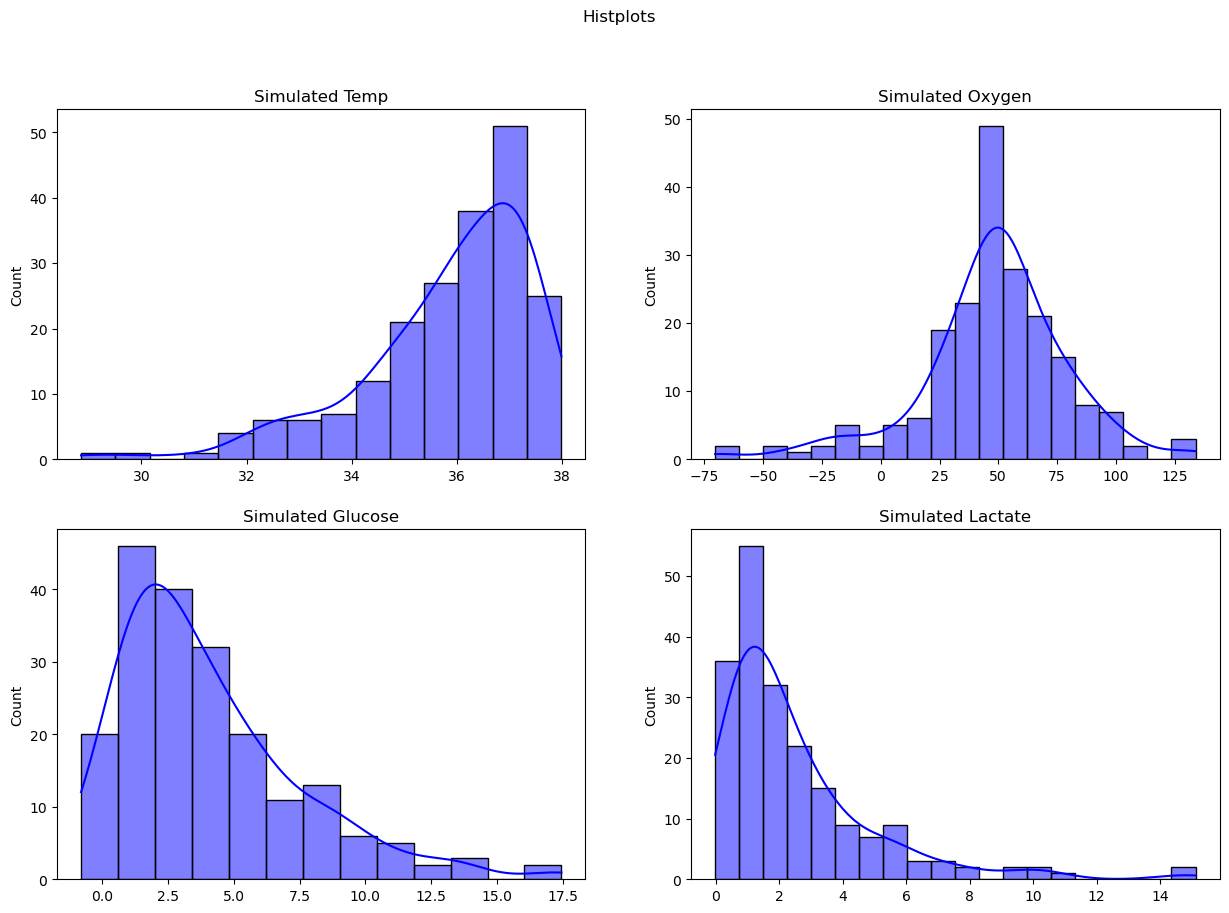

In [19]:
# Histograms for simulated independent variables: 

fig, axs = plt.subplots(2, 2, figsize=[15, 10])
fig.suptitle('Histplots')

sns.histplot(data=templg, 
             kde=True, color='blue', label='Data', 
             ax=axs[0,0]
             )
axs[0,0].set_title('Simulated Temp')

sns.histplot(data=oxygendw, 
             kde=True, color='blue', label='Data', 
             ax=axs[0,1]
             )
axs[0,1].set_title('Simulated Oxygen')

sns.histplot(data=glucosegx, 
             kde=True, color='blue', label='Data', 
             ax=axs[1,0]
             )
axs[1,0].set_title('Simulated Glucose')

sns.histplot(data=lactategx, 
             kde=True, color='blue', label='Data', 
             ax=axs[1,1]
             )
axs[1,1].set_title('Simulated Lactate');

### Column fvcd

Exponential distribution is the best fit for column fvcd. Exponential distribution (or negative exponential distribution) is often used to model elapsed time between specific events (Wikipedia Exponential distribution, 2020) . It has been used to model cell migration in cultures (Czirók et al., 1998) and failure times of devices (Balakrishnan et al., 2019). 

According to Numpy.random.exponential (n.d.), the exponential probability density function is as follows:

![Exponential Distribution](exponential.png)

After specifying the model in column fvcd (Taskesen, 2020a) to get the relevant parameters to fit Numpy.random.exponential (n.d.) for random variates. Numpy.random.exponential (n.d.)only requires scale, but Scipy.stats.expon (n.d.) requires loc and scale. I seeded the scipy random generator according to Kelsey (2013) and Numpy.org random.seed (n.d.).

In [20]:
dists['fvcd']['fit'].model

{'name': 'expon',
 'score': 8.805994379550752e-16,
 'loc': 500000.0,
 'scale': 13069857.142857144,
 'arg': (),
 'params': (500000.0, 13069857.142857144),
 'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7f9e7c358090>,
 'bootstrap_score': 0,
 'bootstrap_pass': None,
 'color': '#e41a1c',
 'CII_min_alpha': 1170396.0300318017,
 'CII_max_alpha': 39653792.85359728}

In [21]:
np.random.seed(seed=42)
fvcde=np.random.exponential(scale=13069857.143, size=200) # loc=500000.000 scale=13069857.143

fvcde

array([ 6133266.89776602, 39341857.08517474, 17209678.10829948,
       11932028.7576173 ,  2216972.82484275,  2216599.30730642,
         782084.15732849, 26286500.0803452 , 12012272.45058913,
       16092262.41378893,   271843.984222  , 45790995.69260891,
       23348378.92768033,  3119613.16380566,  2622845.7145598 ,
        2648102.35195757,  4741139.42213891,  9723030.47405323,
        7391488.67189025,  4498945.33801597, 12368932.12616643,
        1963543.82841225,  4515838.3825619 ,  5963478.05975191,
        7958689.37974455, 20100603.95924929,  2911125.89864493,
        9436817.90936398, 11730258.4926866 ,   621652.72148737,
       12224668.96102107,  2443556.85462126,   879129.96746913,
       38865674.64901847, 44053657.05782869, 21595737.6095328 ,
        4748120.43157786,  1343284.82462387, 15066287.79518374,
        7581704.44255366,  1701071.10462696,  8933864.62220697,
         457362.94016821, 31373184.2210144 ,  3913870.36366814,
       14197208.10799968,  4882200.45852

Text(0.5, 1.0, 'Simulated FVCD')

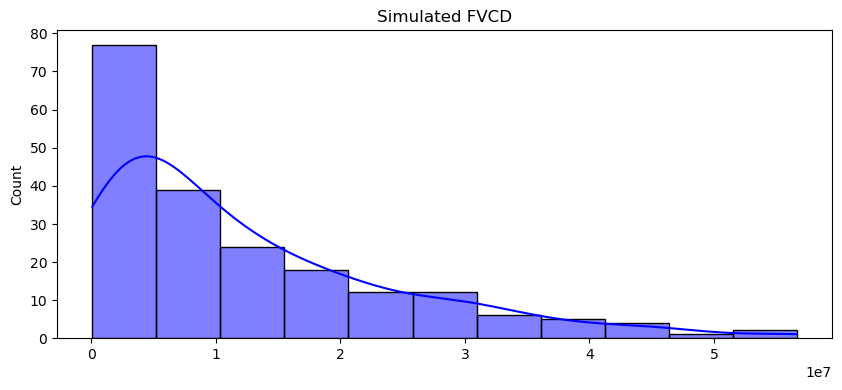

In [22]:
# For the dependent variable fvcd:

fig, axs = plt.subplots(figsize=[10, 4])

sns.histplot(data=fvcde, 
             kde=True, color='blue', label='Data', 
             )

axs.set_title('Simulated FVCD')

Then, I merged multiple arrays into 1 dataset according to Pandas.pydata.org concat (n.d.) and Chen (2020).

In [23]:
concat = pd.concat([
    pd.Series(templg), pd.Series(oxygendw), pd.Series(glucosegx),
    pd.Series(lactategx), pd.Series(fvcde)
],ignore_index=True, axis=1)

concat.columns = ['templg', 'oxygendw', 'glucosegx', 'lactategx', 'fvcde']

concat.head(3)

,templg,oxygendw,glucosegx,lactategx,fvcde
0,37.299962,28.842038,2.487441,1.354683,6.133267e+06
1,35.892698,51.249563,11.491099,8.055937,3.934186e+07
2,33.449363,52.783671,5.408956,3.038449,1.720968e+07


Following that, I exported the dataframe into text file called simcho.csv using convert pandas dataframe to string (Pandas.pydata.org DataFrame.to_csv, n.d.) without the index (Nelamali, 2023). 

In [24]:
concat.to_csv('simcho.csv', index=False)

Then, I imported the dataset in sim.csv in the repository and performed sim.head to show the default first few lines of the dataframe.

In [25]:
sim = pd.read_csv('simcho.csv')
sim.head()

,templg,oxygendw,glucosegx,lactategx,fvcde
0,37.299962,28.842038,2.487441,1.354683,6.133267e+06
1,35.892698,51.249563,11.491099,8.055937,3.934186e+07
2,33.449363,52.783671,5.408956,3.038449,1.720968e+07
3,36.993197,103.174283,4.066826,2.209035,1.193203e+07
4,37.233048,31.073155,1.107161,0.712445,2.216973e+06


# Analysis

## Distribution Plot

Distribution Plots are used to compare observed data and predicted outcomes (or simulated data, in this instance) (Ajay Tech, 2020, UNext, 2023). I generated displots according to Lele (2018) and seaborn.pydata.org displot (n.d.).

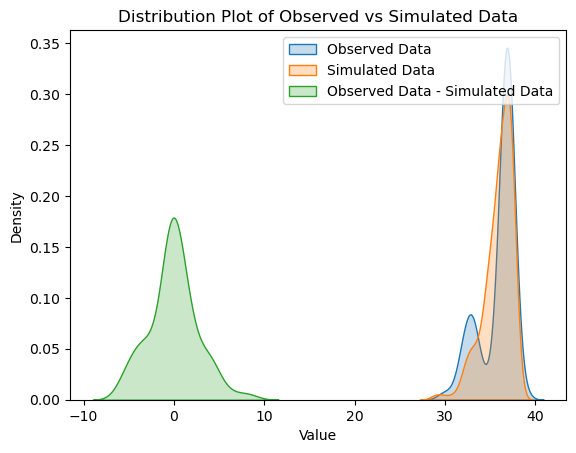

In [55]:
# for temperature, create a KDE (Kernel Density Estimate) plot using Seaborn
difft = df['temp'] - sim['templg']

sns.kdeplot(df['temp'], label='Observed Data', shade=True)
sns.kdeplot(sim['templg'], label='Simulated Data', shade=True)
sns.kdeplot(difft, label='Observed Data - Simulated Data', shade=True)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution Plot of Observed vs Simulated Data')

plt.legend()
plt.show()

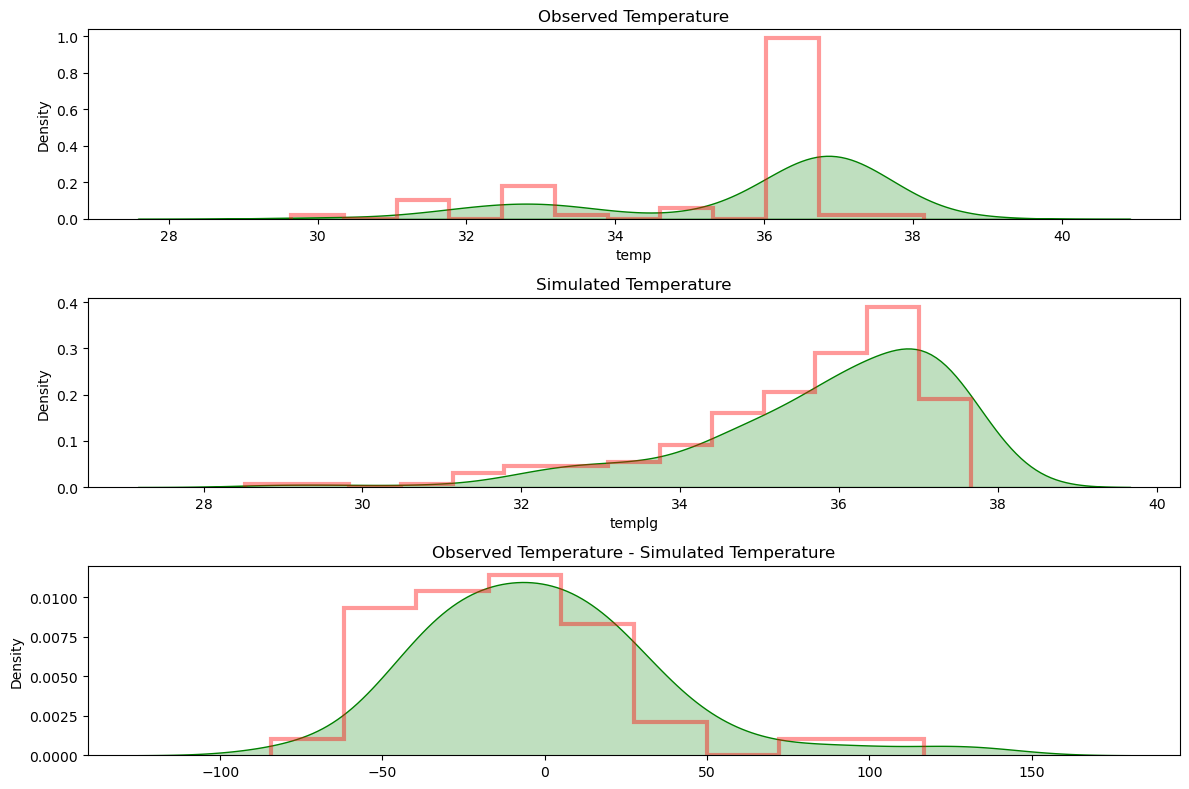

In [78]:
# For temperature, 

fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(311)
sns.distplot(df['temp'], hist_kws={'histtype':'step','align':'left','color':'red','lw':3}, 
             kde_kws={'color':'g','shade':True})
plt.title('Observed Temperature')

ax = fig.add_subplot(312)
sns.distplot(sim['templg'], hist_kws={'histtype':'step','align':'left','color':'red','lw':3}, 
             kde_kws={'color':'g','shade':True})
plt.title('Simulated Temperature')

ax = fig.add_subplot(313)
sns.distplot(difft, hist_kws={'histtype':'step','align':'left','color':'red','lw':3}, 
             kde_kws={'color':'g','shade':True})
plt.title('Observed Temperature - Simulated Temperature')

plt.tight_layout()

plt.show()

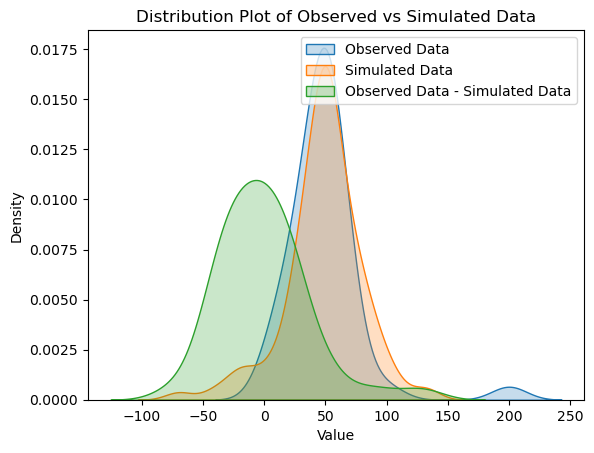

In [60]:
# for oxygen:

diffo = df['oxygen'] - sim['oxygendw']

sns.kdeplot(df['oxygen'], label='Observed Data', shade=True)
sns.kdeplot(sim['oxygendw'], label='Simulated Data', shade=True)
sns.kdeplot(diffo, label='Observed Data - Simulated Data', shade=True)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution Plot of Observed vs Simulated Data')

plt.legend()
plt.show()

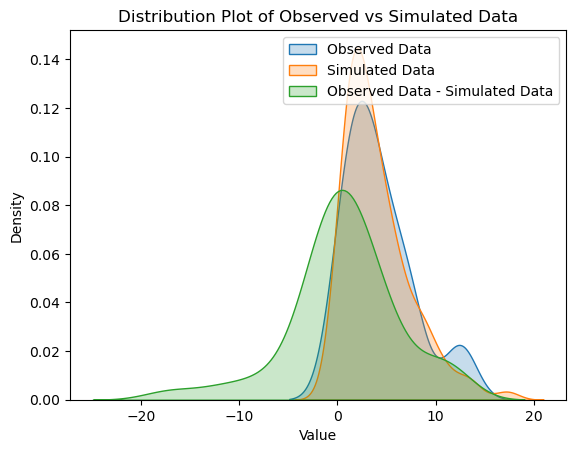

In [61]:
# for glucose:

diffg = df['glucose'] - sim['glucosegx']

sns.kdeplot(df['glucose'], label='Observed Data', shade=True)
sns.kdeplot(sim['glucosegx'], label='Simulated Data', shade=True)
sns.kdeplot(diffg, label='Observed Data - Simulated Data', shade=True)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution Plot of Observed vs Simulated Data')

plt.legend()
plt.show()

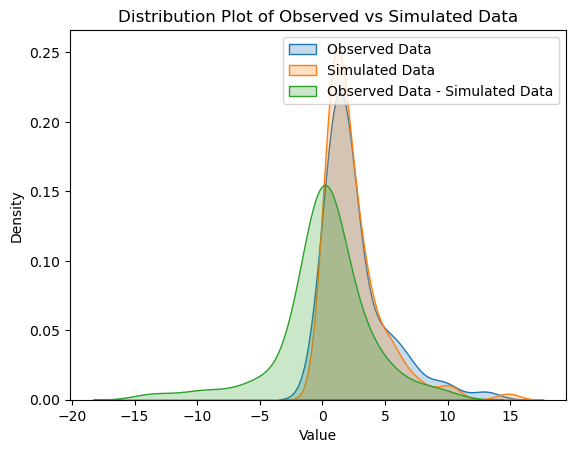

In [62]:
# for lactate:

diffl = df['lactate'] - sim['lactategx']

sns.kdeplot(df['lactate'], label='Observed Data', shade=True)
sns.kdeplot(sim['lactategx'], label='Simulated Data', shade=True)
sns.kdeplot(diffl, label='Observed Data - Simulated Data', shade=True)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution Plot of Observed vs Simulated Data')

plt.legend()
plt.show()

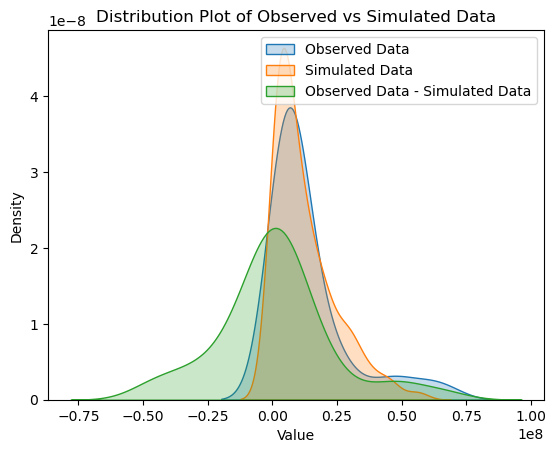

In [67]:
# for final viable cell density (fvcd):

difff = df['fvcd'] - sim['fvcde']

sns.kdeplot(df['fvcd'], label='Observed Data', shade=True)
sns.kdeplot(sim['fvcde'], label='Simulated Data', shade=True)
sns.kdeplot(difff, label='Observed Data - Simulated Data', shade=True)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution Plot of Observed vs Simulated Data')

plt.legend()
plt.show()

###  Correlation

## Scatter Plot

A scatter plot is a data visualization method that shows relationship between 2 variables (Wikipedia Contributors, 2019b). For continuous variables, one variable is on the x axis, and the other on the y axis (www.jmp.com Scatter Plot, n.d.). 

I ran a scatter plot according to seaborn.pydata.org (n.d.), Koehrsen (2018), Ali (2023) and Stack Overflow (2018).

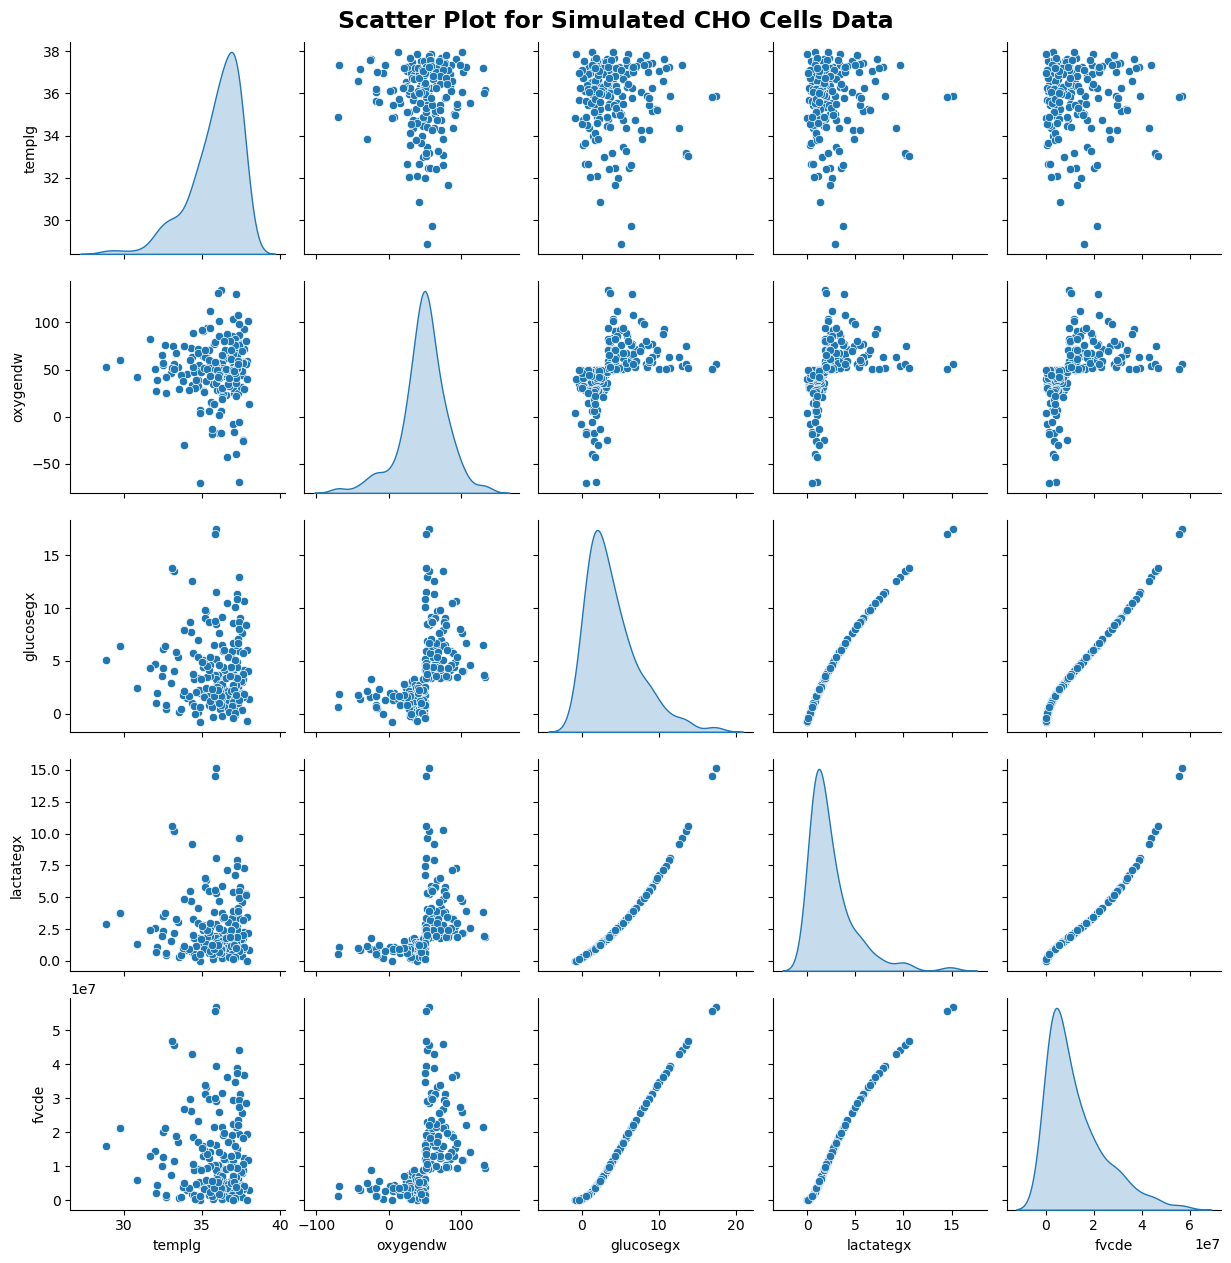

In [26]:
sns.pairplot(sim, diag_kind = 'kde')
plt.suptitle('Scatter Plot for Simulated CHO Cells Data', y=1.01,
             fontweight='bold', size=17);

Output shows that glucose and lactate correspond directly to final viable cell density. Glucose and lactate also has a linear relationship with each other.

## Violin Plot

The violin plot compares probability disributions between 2 variables (Wikipedia Violin Plot, 2020). Using density curves, the curve's width indicates frequency in each section (Yi, 2021). 

I executed Violin plots according to Seaborn.pydata.org violinplot (n.d.) and Stack Overflow (2023) for different y-axes.

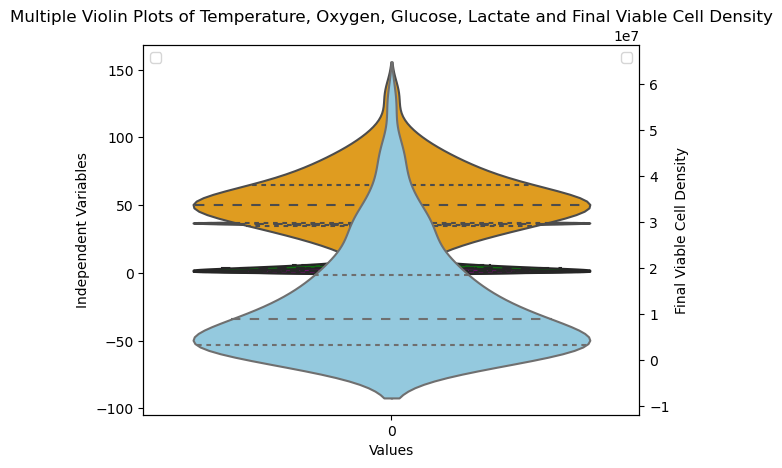

In [27]:
fig, ax1 = plt.subplots() # create a figure and axis

# violin plots on the first y-axis:
sns.violinplot(data=[templg], ax=ax1, color='red', inner='quartile', label='temperature')
sns.violinplot(data=[oxygendw], ax=ax1, color='orange', inner='quartile', label='oxygen')
sns.violinplot(data=[glucosegx], ax=ax1, color='green', inner='quartile', label='gucose')
sns.violinplot(data=[lactategx], ax=ax1, color='purple', inner='quartile', label='lactate')

# for the first y-axis
ax1.set_xlabel('Values')
ax1.set_ylabel('Independent Variables')

ax2 = ax1.twinx() # create a second y-axis

# violin plots on the second y-axis for each dataset
sns.violinplot(data=[fvcde], ax=ax2, color='skyblue', inner='quartile', split=True)

# for the second y-axis
ax2.set_xlabel('Values') 
ax2.set_ylabel('Final Viable Cell Density')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Multiple Violin Plots of Temperature, Oxygen, Glucose, Lactate and Final Viable Cell Density')
plt.show();

Results from the Violin Plot show that

# Box Plot

A Box Plot contains the distribution divided into quartiles where the box represents values closest to the median while the whiskers represent outliers (Banghart, n.d.).  

I generated a Box Plot according to pandas.pydata.org boxplot (n.d.).

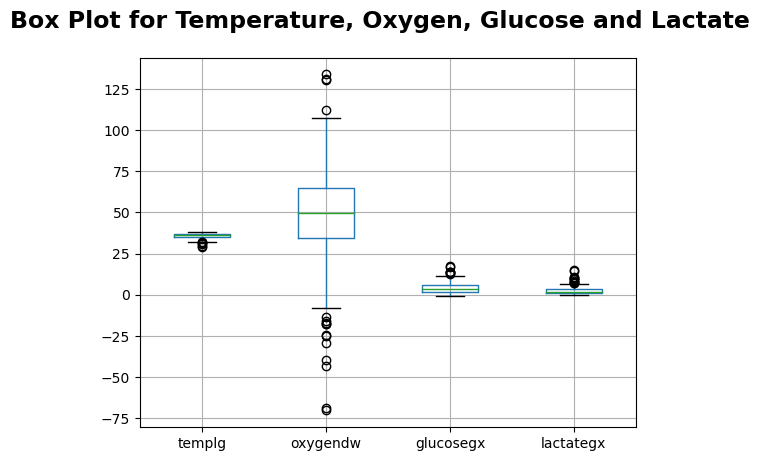

In [28]:
# for independent variables:

boxploti = sim.boxplot(column=['templg', 'oxygendw', 'glucosegx', 'lactategx'])
plt.suptitle('Box Plot for Temperature, Oxygen, Glucose and Lactate',
             fontweight='bold', size=17);

Output shows that the median for temperature is around 30-35°C with outliers in the lower temperatures, glucose around 10g/L and lactate is around 5g/L with outliers under 25g/L.

The median for DO is 50% with a Normal distribution (not skewed). However, I reject that the fact that the data was extremely dispersed with the maximum over 100% and contains negative DO values.

There also seems to be relationship between temperature and DO, and between glucose and lactate.

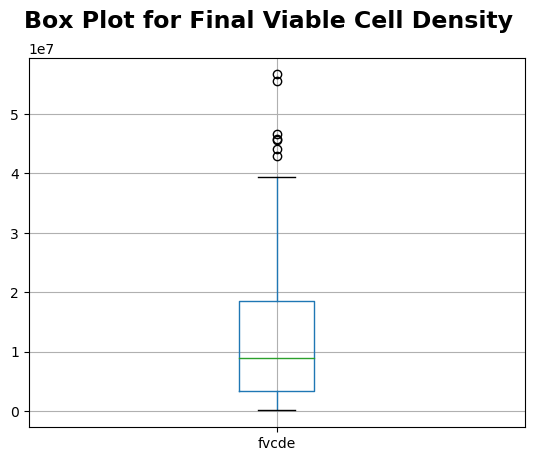

In [29]:
# for dependent variable, fvcde:

boxplotd = sim.boxplot(column=['fvcde'])
plt.suptitle('Box Plot for Final Viable Cell Density',
             fontweight='bold', size=17);

The Final Viable Cell Density distribution is positively skewed (skewed right) with 50% of its data below 2x10<sup>7</sup> cells. The maximum is just under 4x10<sup>7</sup> cells with outliers under 6x10<sup>7</sup> cells.

## Correlation

### Pearson Correlation

The Pearson correlation coefficient (PCC) for sample measures linear correlation between two sets of data (Wikipedia Contributors, 2019). The correlation is considered strong when it is closer to 1 (Statistics Solutions, 2021). The formula according to Wikipedia Contributors (2019a) is shown below:

![sample Pearson Correlation Coefficient](samplepearson.png)

sim.corr was executed according to Pandas.pydata.org DataFrame.corr (n.d.). and Stojiljković (n.d.). I eliminated the upper triangle of the matrix according to Alexandru (2017).

In [30]:
corr = sim.corr(method="pearson")  # instantiate a corr method and call it corr 
bool_upper_matrix = np.tril(np.ones(corr.shape)).astype(bool)  # eliminate upper triangle

corr = corr.where(bool_upper_matrix) 
print('\nPearson Correlation by column\n',corr)


Pearson Correlation by column
              templg  oxygendw  glucosegx  lactategx  fvcde
templg     1.000000       NaN        NaN        NaN    NaN
oxygendw  -0.011699  1.000000        NaN        NaN    NaN
glucosegx -0.054305  0.465640   1.000000        NaN    NaN
lactategx -0.055617  0.388411   0.981447   1.000000    NaN
fvcde     -0.051371  0.466171   0.996476   0.980422    1.0


Results show that glucose and lactate have a strong correlation each other and with fvcde (final number of viable cells). 

## Multiple Linear Regression

For this, I imported linear regression from sklearn (Scikit-learn Developers, 2019), train_test_split from sklearn.model_selection (Scikit-learn, 2018) and r2_score from sklearn.metrics for model accuracy Scikit-learn.org r2_score (n.d.).

After changing the dataframe to numpy array (Pandas.pydata.org to_numpy, n.d.), I performed Multiple linear regression according to Stojiljković (2019), K (2022) and Kim (2019).

In [31]:
# Define X (input, independent) 

x=sim.iloc[:,:4] # or
# df[:,:-1] # get everything except the last column (4)
x

,templg,oxygendw,glucosegx,lactategx
0,37.299962,28.842038,2.487441,1.354683
1,35.892698,51.249563,11.491099,8.055937
2,33.449363,52.783671,5.408956,3.038449
3,36.993197,103.174283,4.066826,2.209035
4,37.233048,31.073155,1.107161,0.712445
...,...,...,...,...
195,35.615297,-13.509808,2.330517,1.276826
196,35.506740,94.361216,5.335201,2.990356
197,34.245638,60.533026,8.690280,5.482538
198,37.826977,79.957433,8.356943,5.206609


In [32]:
# Define Y (output, dependent)

y=sim.iloc[:,4] # or
# y=sim.iloc[:,-1] # get everything in the last column
y

0      6.133267e+06
1      3.934186e+07
2      1.720968e+07
3      1.193203e+07
4      2.216973e+06
           ...     
195    5.614387e+06
196    1.691848e+07
197    2.972213e+07
198    2.850709e+07
199    1.978204e+07
Name: fvcde, Length: 200, dtype: float64

In [33]:
# x to numpy array

tl = sim['templg'].to_numpy()
#tl
ow = sim['oxygendw'].to_numpy()
#ow
gx = sim['glucosegx'].to_numpy()
#gx
lx = sim['lactategx'].to_numpy()
lx # show one example

array([ 1.35468290e+00,  8.05593670e+00,  3.03844916e+00,  2.20903514e+00,
        7.12445003e-01,  7.12371767e-01,  3.68452393e-01,  4.72649861e+00,
        2.22108449e+00,  2.85556684e+00,  1.53466625e-01,  1.02546048e+01,
        4.13543696e+00,  8.78253564e-01,  7.89484336e-01,  7.94128605e-01,
        1.14307899e+00,  1.88168734e+00,  1.54056000e+00,  1.10516555e+00,
        2.27480562e+00,  6.61567337e-01,  1.10782405e+00,  1.32930946e+00,
        1.62361515e+00,  3.53407838e+00,  8.41619593e-01,  1.83973083e+00,
        2.17879524e+00,  3.13575940e-01,  2.25304317e+00,  7.56041794e-01,
        3.98659171e-01,  7.91022447e+00,  9.61859143e+00,  3.80461045e+00,
        1.14416567e+00,  5.23534310e-01,  2.69143453e+00,  1.56844253e+00,
        6.05925624e-01,  1.76613654e+00,  2.48081818e-01,  5.87347300e+00,
        1.01157052e+00,  2.55500068e+00,  1.16497455e+00,  1.86287031e+00,
        1.97257854e+00,  7.98385989e-01,  1.02018847e+01,  3.42884571e+00,
        7.26280287e+00,  

In [34]:
# y to numpy array. Let y be 1D.

yn = sim['fvcde'].to_numpy()
yn

array([ 6133266.89776602, 39341857.08517474, 17209678.10829948,
       11932028.7576173 ,  2216972.82484275,  2216599.30730642,
         782084.15732849, 26286500.0803452 , 12012272.45058913,
       16092262.41378893,   271843.984222  , 45790995.69260891,
       23348378.92768033,  3119613.16380566,  2622845.7145598 ,
        2648102.35195757,  4741139.42213891,  9723030.47405323,
        7391488.67189025,  4498945.33801597, 12368932.12616644,
        1963543.82841225,  4515838.3825619 ,  5963478.05975191,
        7958689.37974455, 20100603.95924929,  2911125.89864493,
        9436817.90936398, 11730258.4926866 ,   621652.72148737,
       12224668.96102107,  2443556.85462126,   879129.96746913,
       38865674.64901847, 44053657.05782869, 21595737.6095328 ,
        4748120.43157786,  1343284.82462387, 15066287.79518374,
        7581704.44255366,  1701071.10462696,  8933864.62220697,
         457362.94016821, 31373184.2210144 ,  3913870.36366814,
       14197208.10799968,  4882200.45852

I called .reshape() on x because it has to be a 2D array with at least 2 columns and multiple rows (Numpy.org reshape, n.d.). 

Let y be 1D in numpy array.

In [35]:
# make x 2D
tlr = tl.reshape(-1,1)
#tlr
owr = ow.reshape(-1,1)
#owr
gxr = gx.reshape(-1,1)
#gxr
lxr = lx.reshape(-1,1)
lxr

array([[ 1.35468290e+00],
       [ 8.05593670e+00],
       [ 3.03844916e+00],
       [ 2.20903514e+00],
       [ 7.12445003e-01],
       [ 7.12371767e-01],
       [ 3.68452393e-01],
       [ 4.72649861e+00],
       [ 2.22108449e+00],
       [ 2.85556684e+00],
       [ 1.53466625e-01],
       [ 1.02546048e+01],
       [ 4.13543696e+00],
       [ 8.78253564e-01],
       [ 7.89484336e-01],
       [ 7.94128605e-01],
       [ 1.14307899e+00],
       [ 1.88168734e+00],
       [ 1.54056000e+00],
       [ 1.10516555e+00],
       [ 2.27480562e+00],
       [ 6.61567337e-01],
       [ 1.10782405e+00],
       [ 1.32930946e+00],
       [ 1.62361515e+00],
       [ 3.53407838e+00],
       [ 8.41619593e-01],
       [ 1.83973083e+00],
       [ 2.17879524e+00],
       [ 3.13575940e-01],
       [ 2.25304317e+00],
       [ 7.56041794e-01],
       [ 3.98659171e-01],
       [ 7.91022447e+00],
       [ 9.61859143e+00],
       [ 3.80461045e+00],
       [ 1.14416567e+00],
       [ 5.23534310e-01],
       [ 2.6

In [36]:
# Split sim dataset into Train and Test

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42) # split test 20%, train 80%

In [37]:
# View the shapes of split data.

print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

x_train: (160, 4)
x_test: (40, 4)
y_train: (160,)
y_test: (40,)


In [38]:
# Train the model

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [39]:
# Predict the Test

y_pred_lr=lr.predict(x_test)
y_pred_lr

array([ 9599802.30814366,  3097312.03767996, 12773475.05937586,
        3969316.67994641, -3529642.44290895, 25684860.22034073,
       61378044.0869026 , 14830701.00932741, 13747311.32179642,
       14571255.53640814,  2045106.38353805, 32670849.10520291,
       22724916.46784639,  6616098.08255719, 21469829.34360007,
        7291270.36083322,   483912.21660768,  1957448.47481819,
        6145714.33382425,   119234.03066413,  3786526.86587357,
        5579146.53906617,  -559808.63463285, 11430490.54798712,
       10967586.37233637,  7293366.06817114,  5689762.21074989,
       20447230.64091698,  8051938.98280178,  1581712.11099304,
       15732575.15733881,  8172911.7104897 , 32156356.7220488 ,
       16920018.24056586, 29999645.22327636, 30039271.4713169 ,
        6011519.63875055, 15934592.19763373,   476322.44233212,
       18955128.31602105])

Next, I evaluated the model using R<sup>2</sup> score and F-test (ANOVA).

R<sup>2</sup> is the coefficient of determination between the observed y and the predicted y, and the closer the value is to 100%, the better the regression model fits the observation (Frost, 2018). The R<sup>2</sup> value was generated according to GeeksforGeeks R2 score (2020) and Atha (2020).

In [40]:
# Evaluate the model

Accuracy=r2_score(y_test,y_pred_lr)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 99.03


Results of Multiple Linear Regression shows that the accuracy of the model is 99.03, which means that 99.03% of the data fit the regression model.

I can also predict the Final Viable Cell Density at different independent variable values (www.w3schools.com Multiple Regression, n.d.), for example, at 38°C, 65% DO, glucose 10g/L and lactate 5g/L:

In [41]:
predictedfvcde = lr.predict([[38, 65, 10, 5]]) # make predictions on the X_test data (unseen data)
# model does not know the statistics on the test data, only on train data

print(predictedfvcde) 

[32220534.0265184]


Results show that at 38°C, 65% DO, glucose 10g/L and lactate 5g/L, the predicted Final Viable Cell Density is 3.22x10<sup>7</sup> cells.

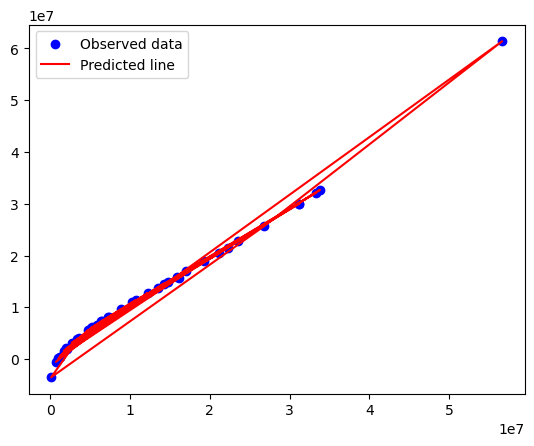

In [42]:
# Finally, I plotted the results

plt.scatter(y_test,y_pred_lr, color ='blue')
plt.plot(y_test, y_pred_lr, 'r')
plt.legend(["Observed data", "Predicted line"])
plt.show();

## Conclusions

A simulated dataset containing 5 variables (4 independent, 1 dependent) was generated using numpy random package and scipy stats. 

## References

Reference listAbu-Absi, N.R., Kenty, B.M., Cuellar, M.E., Borys, M.C., Sakhamuri, S., Strachan, D.J., Hausladen, M.C. and Li, Z.J. (2010). Real time monitoring of multiple parameters in mammalian cell culture bioreactors using an in-line Raman spectroscopy probe. Biotechnology and Bioengineering, 108(5), pp.1215–1221. doi:https://doi.org/10.1002/bit.23023.Al-Fageeh, M.B., Marchant, R.J., Carden, M.J. and Smales, C.M. (2006). The cold-shock response in cultured mammalian cells: Harnessing the response for the improvement of recombinant protein production. Biotechnology and Bioengineering, 93(5), pp.829–835. doi:https://doi.org/10.1002/bit.20789.Alexandru, D. (2017). Simple analysis of Iris dataset. [online] kaggle.com. Available at: https://www.kaggle.com/code/danalexandru/simple-analysis-of-iris-dataset [Accessed 23 Nov. 2023].Alhuthali, S., Kotidis, P. and Kontoravdi, C. (2021). Osmolality Effects on CHO Cell Growth, Cell Volume, Antibody Productivity and Glycosylation. International Journal of Molecular Sciences, [online] 22(7), p.3290. doi:https://doi.org/10.3390/ijms22073290.Ali, M. (2023). Python Seaborn Tutorial For Beginners: Start Visualizing Data. [online] Datacamp.com. Available at: https://www.datacamp.com/tutorial/seaborn-python-tutorial [Accessed 21 Nov. 2023].Atha, R. (2020). Multi-Linear Regression Using Python. [online] The Startup. Available at: https://medium.com/swlh/multi-linear-regression-using-python-44bd0d10082d [Accessed 23 Nov. 2023].Balakrishnan, N., Castilla, E., Martín, N. and Pardo, L. (2019). Robust Estimators and Test Statistics for One-Shot Device Testing Under the Exponential Distribution. IEEE Transactions on Information Theory, 65(5), pp.3080–3096. doi:https://doi.org/10.1109/tit.2019.2903244.Banghart, M. (n.d.). 3.3 Relationships between continuous and categorical variables | Data Wrangling Essentials. [online] sscc.wisc.edu. Available at: https://sscc.wisc.edu/sscc/pubs/DWE/book/3-3-sect-ggplot-categorical.html [Accessed 21 Nov. 2023].Becerra, S., Berrios, J., Osses, N. and Altamirano, C. (2012). Exploring the effect of mild hypothermia on CHO cell productivity. Biochemical Engineering Journal, 60, pp.1–8. doi:https://doi.org/10.1016/j.bej.2011.10.003.Bevans, R. (2020). Multiple Linear Regression | A Quick and Simple Guide. [online] Scribbr. Available at: https://www.scribbr.com/statistics/multiple-linear-regression/ [Accessed 22 Nov. 2023].Bhatia, S. (2015). Plant Tissue Culture. In: Modern Applications of Plant Biotechnology in Pharmaceutical Sciences. [online] Academic Press. Available at: https://www.sciencedirect.com/book/9780128022214/modern-applications-of-plant-biotechnology-in-pharmaceutical-sciences#book-info [Accessed 14 Nov. 2023].Brunner, M., Doppler, P., Klein, T., Herwig, C. and Fricke, J. (2018). Elevated pCO2
 affects the lactate metabolic shift in CHO cell culture processes. Engineering in Life Sciences, 18(3), pp.204–214. doi:https://doi.org/10.1002/elsc.201700131.Bruno, T. (2020). Subplotting with matplotlib and seaborn. [online] DEV Community. Available at: https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8 [Accessed 19 Nov. 2023].Chan, S.P. (1993). A Statistical Study of Log-Gamma Distribution. [online] macsphere.mcmaster.ca. Available at: https://macsphere.mcmaster.ca/handle/11375/6816 [Accessed 18 Nov. 2023].Chen, B. (2020). Pandas concat() tricks you should know to speed up your data analysis. [online] Medium. Available at: https://towardsdatascience.com/pandas-concat-tricks-you-should-know-to-speed-up-your-data-analysis-cd3d4fdfe6dd [Accessed 21 Nov. 2023].Chen, J., Marvin, A.C., Flintoft, I.D. and Dawson, J.F. (2010). Double-Weibull distributions of the re-emission spectra from a non-linear device in a mode stirred chamber. White Rose Research Online (University of Leeds, The University of Sheffield, University of York). doi:https://doi.org/10.1109/isemc.2010.5711334.Content Lab U.S. (2015). DARZALEX® (daratumumab) Approved by U.S. FDA: First Human Anti-CD38 Monoclonal Antibody Available for the Treatment of Multiple Myeloma | Johnson & Johnson. [online] Available at: https://www.jnj.com/media-center/press-releases/darzalex-daratumumab-approved-by-us-fda-first-human-anti-cd38-monoclonal-antibody-available-for-the-treatment-of-multiple-myeloma [Accessed 13 Nov. 2023].Czirók, A., Schlett, K., MadarászE. and Vicsek, T. (1998). Exponential Distribution of Locomotion Activity in Cell Cultures. Physical Review Letters, 81(14), pp.3038–3041. doi:https://doi.org/10.1103/physrevlett.81.3038.Dabhadkar, M.M., Palekar, S.R. and Pawar, K.N. (2022). A review on ‘monoclonal antibodies: effective treatment against COVID-19’. International Journal of Community Medicine and Public Health, 10(1), pp.525–525. doi:https://doi.org/10.18203/2394-6040.ijcmph20223584.DeLuca, K.F., Mick, J.E. and DeLuca, J.G. (2022). Production and purification of recombinant monoclonal antibodies from human cells based on a primary sequence. STAR protocols, 3(4), pp.101915–101915. doi:https://doi.org/10.1016/j.xpro.2022.101915.Domján, J., Pantea, E., Gyürkés, M., Madarász, L., Kozák, D., Farkas, A., Horváth, B., Benkő, Z., Nagy, Z.K., Marosi, G. and Hirsch, E. (2022). Real‐time amino acid and glucose monitoring system for the automatic control of nutrient feeding in CHO cell culture using Raman spectroscopy. Biotechnology Journal, 17(5), pp.2100395–2100395. doi:https://doi.org/10.1002/biot.202100395.Dowd, J.E., Kwok, K.E. and Piret, J.M. (2001). Glucose-based optimization of CHO-cell perfusion cultures. Biotechnology and Bioengineering, 75(2), pp.252–256. doi:https://doi.org/10.1002/bit.10013.Eberle, C. (2023). Antibody production in CHO cells: Advantages & Disadvantages. [online] evitria.com. Available at: https://www.evitria.com/journal/antibodies/antibody-production-cho-cells-advantages/ [Accessed 12 Nov. 2023].Evin, G., Merleau, J. and Perreault, L. (2011). Two-component mixtures of normal, gamma, and Gumbel distributions for hydrological applications. Water Resources Research, 47(8). doi:https://doi.org/10.1029/2010wr010266.Fan, L., Zhao, L., Ye, Z., Sun, Y., Kou, T., Zhou, Y. and Tan, W.-S. (2010). Effect of culture temperature on TNFR-Fc productivity in recombinant glutamine synthetase-chinese hamster ovary cells. Biotechnology Letters, 32(9), pp.1239–1244. doi:https://doi.org/10.1007/s10529-010-0318-5.Frost, J. (2018). How To Interpret R-squared in Regression Analysis. [online] Statistics By Jim. Available at: https://statisticsbyjim.com/regression/interpret-r-squared-regression/ [Accessed 23 Nov. 2023].Gagnon, M., Hiller, G., Luan, Y.-T., Kittredge, A., DeFelice, J. and Drapeau, D. (2011). High-End pH-controlled delivery of glucose effectively suppresses lactate accumulation in CHO Fed-batch cultures. Biotechnology and Bioengineering, 108(6), pp.1328–1337. doi:https://doi.org/10.1002/bit.23072.GeeksforGeeks R2 score. (2020). Python - Coefficient of Determination-R2 score. [online] Available at: https://www.geeksforgeeks.org/python-coefficient-of-determination-r2-score/ [Accessed 23 Nov. 2023].GeeksforGeeks. (2019). Python - Log Gamma Distribution in Statistics. [online] Available at: https://www.geeksforgeeks.org/python-log-gamma-distribution-in-statistics/ [Accessed 19 Nov. 2023].Gibbons, L., Maslanka, F., Le, N., Magill, A., Singh, P.K., McLaughlin, J., Madden, F., Hayes, R., McCarthy, B., Rode, C.K., O’Mahony, J., Rea, R. and O’Mahony-Hartnett, C. (2023). An assessment of the impact of Raman based glucose feedback control on CHO cell bioreactor process development. Biotechnology Progress. doi:https://doi.org/10.1002/btpr.3371.Gómez, Y.M., Heleno Bolfarine and Gómez, H.W. (2019). Gumbel distribution with heavy tails and applications to environmental data. Mathematics and Computers in Simulation, 157, pp.115–129. doi:https://doi.org/10.1016/j.matcom.2018.10.003.Great Learning Team (2023). 4 Types Of Data - Nominal, Ordinal, Discrete and Continuous - Great Learning. [online] GreatLearning Blog: Free Resources what Matters to shape your Career! Available at: https://www.mygreatlearning.com/blog/types-of-data/ [Accessed 20 Nov. 2023].Hayes, A. (2023). How Multiple Linear Regression Works. [online] Investopedia. Available at: https://www.investopedia.com/terms/m/mlr.asp [Accessed 22 Nov. 2023].Hippach, M.B., Schwartz, I., Pei, J., Huynh, J., Kawai, Y. and Zhu, M.M. (2018). Fluctuations in dissolved oxygen concentration during a CHO cell culture process affects monoclonal antibody productivity and the sulfhydryl‐drug conjugation process. Biotechnology Progress, 34(6), pp.1427–1437. doi:https://doi.org/10.1002/btpr.2697.Ho, S.C.L., Koh, E.Y.C., van Beers, M., Mueller, M., Wan, C., Teo, G., Song, Z., Yen Wah Tong, Bardor, M. and Yang, Y. (2013). Control of IgG LC:HC ratio in stably transfected CHO cells and study of the impact on expression, aggregation, glycosylation and conformational stability. Journal of Biotechnology, 165(3-4), pp.157–166. doi:https://doi.org/10.1016/j.jbiotec.2013.03.019.Huang, Z., Xu, J., Yongky, A., Morris, C.S., Polanco, A.L., Reily, M., Borys, M.C., Li, Z.J. and Yoon, S. (2020). CHO cell productivity improvement by genome-scale modeling and pathway analysis: Application to feed supplements. Biochemical Engineering Journal, 160, p.107638. doi:https://doi.org/10.1016/j.bej.2020.107638.Hwang, H.-J., Park, B.-W. and Chung, M.-S. (2023). Comparison of microbial reduction effect of intense pulsed light according to growth stage and population density of Escherichia coli ATCC 25922 using a double Weibull model. Food Research International, 164, pp.112353–112353. doi:https://doi.org/10.1016/j.foodres.2022.112353.Hwang, H.-J., Seo, J.-H., Jeong, C., Cheigh, C.-I. and Chung, M.-S. (2019). Analysis of bacterial inactivation by intense pulsed light using a double-Weibull survival model. Innovative Food Science and Emerging Technologies, 56, pp.102185–102185. doi:https://doi.org/10.1016/j.ifset.2019.102185.Jain, E. and Kumar, A. (2008). Upstream processes in antibody production: Evaluation of critical parameters. Biotechnology Advances, [online] 26(1), pp.46–72. Available at: https://www.sciencedirect.com/science/article/abs/pii/S0734975007000985?via%3Dihub [Accessed 13 Nov. 2023].Jenkins, N. and Hovey, A. (1993). Temperature control of growth and productivity in mutant Chinese hamster ovary cells synthesizing a recombinant protein. Biotechnology and Bioengineering, 42(9), pp.1029–1036. doi:https://doi.org/10.1002/bit.260420903.Jennewein, M.F. and Alter, G. (2017). The Immunoregulatory Roles of Antibody Glycosylation. Trends in Immunology, 38(5), pp.358–372. doi:https://doi.org/10.1016/j.it.2017.02.004.Jyothilekshmi, I. and Jayaprakash, N.S. (2021). Trends in Monoclonal Antibody Production Using Various Bioreactor Syst. Journal of Microbiology and Biotechnology, 31(3), pp.349–357. doi:https://doi.org/10.4014/jmb.1911.11066.K, A. (2022). Multiple Linear Regression using Python. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2022/03/multiple-linear-regression-using-python/ [Accessed 22 Nov. 2023].Kelsey (2013). scipy.stats seed? [online] Stack Overflow. Available at: https://stackoverflow.com/questions/16016959/scipy-stats-seed [Accessed 21 Nov. 2023].Kim, E. (2019). Multiple Linear Regression and Visualization in Python. [online] Pythonic Excursions. Available at: https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python [Accessed 22 Nov. 2023].Koehrsen, W. (2018). Visualizing Data with Pairs Plots in Python. [online] Medium. Available at: https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166 [Accessed 21 Nov. 2023].Kou, T.-C., Fan, L., Zhou, Y., Ye, Z.-Y., Liu, X.-P., Zhao, L. and Tan, W.-S. (2011). Detailed understanding of enhanced specific productivity in Chinese hamster ovary cells at low culture temperature. Journal of Bioscience and Bioengineering, 111(3), pp.365–369. doi:https://doi.org/10.1016/j.jbiosc.2010.11.016.Kunert, R. and Reinhart, D. (2016). Advances in recombinant antibody manufacturing. Applied Microbiology and Biotechnology, [online] 100(8), pp.3451–3461. doi:https://doi.org/10.1007/s00253-016-7388-9.Li, F., Vijayasankaran, N., Shen, A. (Yijuan), Kiss, R. and Amanullah, A. (2010). Cell culture processes for monoclonal antibody production. mAbs, [online] 2(5), pp.466–479. doi:https://doi.org/10.4161/mabs.2.5.12720.Li, F., Zhou, J.X., Yang, X., Tressel, T. and Lee, B. (2004). Current Therapeutic Antibody Production and Process Optimization. Bioprocessing Journal. [online] Available at: https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=213c35387b580e5c2fa211f414dc5c219557733e [Accessed 13 Nov. 2023].Li, J., Wong, C.L., Vijayasankaran, N., Hudson, T. and Amanullah, A. (2011). Feeding lactate for CHO cell culture processes: Impact on culture metabolism and performance. Biotechnology and Bioengineering, 109(5), pp.1173–1186. doi:https://doi.org/10.1002/bit.24389.Li, M., Ebel, B., Blanchard, F., Paris, C., Guedon, E. and Marc, A. (2019). Control of IgG glycosylation by in situ and real‐time estimation of specific growth rate of CHO cells cultured in bioreactor. Biotechnology and Bioengineering, 116(5), pp.985–993. doi:https://doi.org/10.1002/bit.26914.Li, M., Ebel, B., Chauchard, F., Guédon, E. and Marc, A. (2018a). Parallel comparison of in situ Raman and NIR spectroscopies to simultaneously measure multiple variables toward real-time monitoring of CHO cell bioreactor cultures. Biochemical Engineering Journal, 137, pp.205–213. doi:https://doi.org/10.1016/j.bej.2018.06.005.Li, M.-Y., Ebel, B., Paris, C., Chauchard, F., Guedon, E. and Marc, A. (2018b). Real-time monitoring of antibody glycosylation site occupancy by in situ
 Raman spectroscopy during bioreactor CHO cell cultures. Biotechnology Progress, 34(2), pp.486–493. doi:https://doi.org/10.1002/btpr.2604.Li, Z.-M., Fan, Z.-L., Wang, X.-Y. and Wang, T.-Y. (2022). Factors Affecting the Expression of Recombinant Protein and Improvement Strategies in Chinese Hamster Ovary Cells. Frontiers in Bioengineering and Biotechnology, 10. doi:https://doi.org/10.3389/fbioe.2022.880155.Liang, K., Luo, H. and Li, Q. (2023). Enhancing and stabilizing monoclonal antibody production by Chinese hamster ovary (CHO) cells with optimized perfusion culture strategies. Frontiers in Bioengineering and Biotechnology, 11. doi:https://doi.org/10.3389/fbioe.2023.1112349.Lipan, O., Jean Marc Navenot, Wang, Z., Huang, L. and Peiper, S.C. (2007). Heat Shock Response in CHO Mammalian Cells Is Controlled by a Nonlinear Stochastic Process. PLOS Computational Biology, 3(10), pp.e187–e187. doi:https://doi.org/10.1371/journal.pcbi.0030187.López-Meza, J., Araíz-Hernández, D., Carrillo-Cocom, L.M., López-Pacheco, F., Rocha-Pizaña, M. del R. and Alvarez, M.M. (2016). Using simple models to describe the kinetics of growth, glucose consumption, and monoclonal antibody formation in naive and infliximab producer CHO cells. Cytotechnology, [online] 68(4), pp.1287–1300. doi:https://doi.org/10.1007/s10616-015-9889-2.Malik, B. and Ghatol, A. (2023). Understanding How Monoclonal Antibodies Work. [online] PubMed. Available at: https://www.ncbi.nlm.nih.gov/books/NBK572118/ [Accessed 13 Nov. 2023].Malloy, G. (2023). How to use distfit package in Python. [online] Medium. Available at: https://blog.devgenius.io/how-to-use-distfit-package-in-python-b5a7b18c5d6c [Accessed 19 Nov. 2023].Markose, S.M. and Alentorn, A. (2005). The Generalized Extreme Value (GEV) Distribution, Implied Tail Index and Option Pricing. [online] ideas.repec.org. Available at: https://repository.essex.ac.uk/3726/ [Accessed 20 Nov. 2023].Martínez-Monge, I., Comas, P., Triquell, J., Casablancas, A., Lecina, M., Paredes, C.J. and Cairó, J.J. (2019). Concomitant consumption of glucose and lactate: A novel batch production process for CHO cells. Biochemical Engineering Journal, 151, p.107358. doi:https://doi.org/10.1016/j.bej.2019.107358.Masayoshi Onitsuka, Kawaguchi, A.T., Asano, R., Kumagai, I., Honda, K., Hisao Ohtake and Takeshi Ômasa (2014). Glycosylation analysis of an aggregated antibody produced by Chinese hamster ovary cells in bioreactor culture. Journal of Bioscience and Bioengineering, 117(5), pp.639–644. doi:https://doi.org/10.1016/j.jbiosc.2013.11.001.Masterton, R.J. and Smales, C.M. (2014). The impact of process temperature on mammalian cell lines and the implications for the production of recombinant proteins in CHO cells. Pharmaceutical Bioprocessing, 2(1), pp.49–61. doi:https://doi.org/10.4155/pbp.14.3.Matplotlib.pyplot.subplots. (n.d.). matplotlib.pyplot.subplots — Matplotlib 3.6.0 documentation. [online] Available at: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html [Accessed 19 Nov. 2023].Mayo Clinic (2019). Monoclonal antibody drugs for cancer: How they work. [online] Mayo Clinic. Available at: https://www.mayoclinic.org/diseases-conditions/cancer/in-depth/monoclonal-antibody/art-20047808 [Accessed 13 Nov. 2023].Mayo, M. (2022). How to Determine the Best Fitting Data Distribution Using Python. [online] KDnuggets. Available at: https://www.kdnuggets.com/2021/09/determine-best-fitting-data-distribution-python.html [Accessed 19 Nov. 2023].McHugh, K.P., Xu, J., Aron, K.L., Borys, M.C. and Li, Z.J. (2020). Effective temperature shift strategy development and scale confirmation for simultaneous optimization of protein productivity and quality in Chinese hamster ovary cells. Biotechnology Progress, 36(3). doi:https://doi.org/10.1002/btpr.2959.Meuwly, F., Loviat, F., Ruffieux, P.-A. ., Bernard, A., Kadouri, A. and von Stockar, U. (2006a). Oxygen supply for CHO cells immobilized on a packed-bed of Fibra-Cel® disks. Biotechnology and Bioengineering, 93(4), pp.791–800. doi:https://doi.org/10.1002/bit.20766.Meuwly, F., Papp, F., Ruffieux, P.-A. ., Bernard, A.R., Kadouri, A. and von Stockar, U. (2006b). Use of glucose consumption rate (GCR) as a tool to monitor and control animal cell production processes in packed-bed bioreactors. Journal of Biotechnology, [online] 122(1), pp.122–129. doi:https://doi.org/10.1016/j.jbiotec.2005.08.005.MSD Connect UK. (2022). About KEYTRUDA | KEYTRUDA® (pembrolizumab). [online] Available at: https://www.msdconnect.co.uk/products/keytruda/ [Accessed 13 Nov. 2023].Nascimento, F., Bourguignon, M. and Leão, J. (2015). Extended generalized extreme value distribution with applications in environmental data. Hacettepe Journal of Mathematics and Statistics, 46(95), pp.1–1. doi:https://doi.org/10.15672/hjms.20159514081.Nelamali, N. (2023). Export Pandas to CSV without Index & Header. [online] Spark By {Examples}. Available at: https://sparkbyexamples.com/pandas/pandas-to-csv-no-index/ [Accessed 21 Nov. 2023].Nienow, A.W., Rielly, C.D., Brosnan, K., Bargh, N., Lee, K., Coopman, K. and Hewitt, C.J. (2013). The physical characterisation of a microscale parallel bioreactor platform with an industrial CHO cell line expressing an IgG4. Biochemical Engineering Journal, 76, pp.25–36. doi:https://doi.org/10.1016/j.bej.2013.04.011.Numpy.concatenate. (n.d.). numpy.concatenate — NumPy v1.22 Manual. [online] Available at: https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html [Accessed 20 Nov. 2023].Numpy.org linspace. (n.d.). numpy.linspace — NumPy v1.23 Manual. [online] Available at: https://numpy.org/doc/stable/reference/generated/numpy.linspace.html [Accessed 22 Nov. 2023].Numpy.org random.seed. (n.d.). numpy.random.seed — NumPy v1.21 Manual. [online] Available at: https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html [Accessed 21 Nov. 2023].Numpy.org reshape. (n.d.). numpy.reshape — NumPy v1.20 Manual. [online] Available at: https://numpy.org/doc/stable/reference/generated/numpy.reshape.html [Accessed 22 Nov. 2023].Numpy.random.exponential. (n.d.). numpy.random.exponential — NumPy v1.21 Manual. [online] Available at: https://numpy.org/doc/stable/reference/random/generated/numpy.random.exponential.html.Numpy.random.gumbel. (n.d.). numpy.random.gumbel — NumPy v2.0.dev0 Manual. [online] Available at: https://numpy.org/devdocs/reference/random/generated/numpy.random.gumbel.html [Accessed 19 Nov. 2023].Okamura, K., Badr, S., Murakami, S. and Sugiyama, H. (2022). Hybrid Modeling of CHO Cell Cultivation in Monoclonal Antibody Production with an Impurity Generation Module. Industrial & Engineering Chemistry Research, 61(40), pp.14898–14909. doi:https://doi.org/10.1021/acs.iecr.2c00736.Ozturk, S.S., Thrift, J.C., Blackie, J.D. and Naveh, D. (1997). Real-time monitoring and control of glucose and lactate concentrations in a mammalian cell perfusion reactor. Biotechnology and Bioengineering, 53(4), pp.372–378. doi:https://doi.org/10.1002/(sici)1097-0290(19970220)53:4%3C372::aid-bit3%3E3.0.co;2-k.pandas.pydata.org boxplot. (n.d.). pandas.DataFrame.boxplot — pandas 1.3.4 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html [Accessed 21 Nov. 2023].Pandas.pydata.org concat. (n.d.). pandas.concat — pandas 1.3.4 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.concat.html [Accessed 20 Nov. 2023].Pandas.pydata.org DataFrame.corr. (n.d.). pandas.DataFrame.corr — pandas 1.3.2 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html [Accessed 21 Nov. 2023].Pandas.pydata.org DataFrame.to_csv. (n.d.). pandas.DataFrame.to_csv — pandas 1.2.4 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html [Accessed 20 Nov. 2023].Pandas.pydata.org to_numpy. (n.d.). pandas.DataFrame.to_numpy — pandas 1.2.3 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html [Accessed 22 Nov. 2023].Pandas.pydata.org. (n.d.). pandas.DataFrame.describe — pandas 1.3.4 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html [Accessed 19 Nov. 2023].Pérez-Rodriguez, S., Ramírez-Lira, M. de J., Trujillo-Roldán, M.A. and Valdez-Cruz, N.A. (2020). Nutrient supplementation strategy improves cell concentration and longevity, monoclonal antibody production and lactate metabolism of Chinese hamster ovary cells. Bioengineered, 11(1), pp.463–471. doi:https://doi.org/10.1080/21655979.2020.1744266.Pharmaceutical Technology. (2003). Chugai Pharmaceutical Bulk Antibody. [online] Available at: https://www.pharmaceutical-technology.com/projects/chugay/?cf-view [Accessed 16 Nov. 2023].Ranjan, S. (2018). Python | Pandas dataframe.info(). [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/python-pandas-dataframe-info/ [Accessed 19 Nov. 2023].Raoniar, R. (2022). Finding the Best Distribution that Fits Your Data using Python’s Fitter Library. [online] The Researchers’ Guide. Available at: https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9 [Accessed 19 Nov. 2023].Reddy, J.V., Raudenbush, K., Papoutsakis, E.T. and Ierapetritou, M.G. (2023). Cell-culture process optimization via model-based predictions of metabolism and protein glycosylation. Biotechnology Advances, 67, pp.108179–108179. doi:https://doi.org/10.1016/j.biotechadv.2023.108179.Restelli, V., Wang, M.-D., Huzel, N., Ethier, M., Perreault, H. and Butler, M. (2006). The effect of dissolved oxygen on the production and the glycosylation profile of recombinant human erythropoietin produced from CHO cells. Biotechnology and Bioengineering, 94(3), pp.481–494. doi:https://doi.org/10.1002/bit.20875.Rodrigues, M.E., Costa, A.R., Henriques, M., Azeredo, J. and Oliveira, R. (2009). Technological progresses in monoclonal antibody production systems. Biotechnology Progress, p.NA-NA. doi:https://doi.org/10.1002/btpr.348.Rowland‐Jones, R.C. and Jaques, C. (2018). At‐line raman spectroscopy and design of experiments for robust monitoring and control of miniature bioreactor cultures. Biotechnology Progress, 35(2), p.e2740. doi:https://doi.org/10.1002/btpr.2740.Schofield, D. (2023). Monoclonal antibody production: Process, Technologies & Steps. [online] evitria. Available at: https://www.evitria.com/journal/monoclonal-antibodies/monoclonal-antibody-production/?utm_term=&utm_campaign=DSA+Journal+evitria.com&utm_source=adwords&utm_medium=ppc&hsa_acc=5241823564&hsa_cam=12420631398&hsa_grp=117890023163&hsa_ad=500902445910&hsa_src=g&hsa_tgt=dsa-468439974237&hsa_kw=&hsa_mt=&hsa_net=adwords&hsa_ver=3&gclid=Cj0KCQiAr8eqBhD3ARIsAIe-buPw5xlTj0JoRyBKNJ9mfQpyi7T6fIiYX6oJOphf2aJnYoHwOld0cUgaAptFEALw_wcB [Accessed 13 Nov. 2023].Scikit-learn (2018). sklearn.model_selection.train_test_split — scikit-learn 0.20.3 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html [Accessed 22 Nov. 2023].Scikit-learn Developers (2019). sklearn.linear_model.LinearRegression — scikit-learn 0.22 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html [Accessed 22 Nov. 2023].Scikit-learn.org r2_score. (n.d.). sklearn.metrics.r2_score — scikit-learn 0.24.1 documentation. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html [Accessed 22 Nov. 2023].Scipy.stats.dweibull. (n.d.). scipy.stats.dweibull — SciPy v1.11.3 Manual. [online] Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.dweibull.html [Accessed 19 Nov. 2023].Scipy.stats.expon. (n.d.). scipy.stats.expon — SciPy v1.11.4 Manual. [online] Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html [Accessed 19 Nov. 2023].Scipy.stats.genextreme. (n.d.). scipy.stats.genextreme — SciPy v1.10.0 Manual. [online] Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.genextreme.html [Accessed 20 Nov. 2023].Scipy.stats.loggamma. (n.d.). scipy.stats.loggamma — SciPy v1.11.4 Manual. [online] Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.loggamma.html [Accessed 19 Nov. 2023].SciSpace - Question. (n.d.). What are some applications of the Log Gamma distribution? | 5 Answers from Research papers. [online] Available at: https://typeset.io/questions/what-are-some-applications-of-the-log-gamma-distribution-5ej6xn5isn [Accessed 18 Nov. 2023].Seaborn.pydata.org violinplot. (n.d.). seaborn.violinplot — seaborn 0.10.1 documentation. [online] Available at: https://seaborn.pydata.org/generated/seaborn.violinplot.html [Accessed 21 Nov. 2023].seaborn.pydata.org. (n.d.). Scatterplot with continuous hues and sizes — seaborn 0.13.0 documentation. [online] Available at: https://seaborn.pydata.org/examples/scatterplot_sizes.html [Accessed 21 Nov. 2023].Siddiquee, K., Zhao, C., Stemler, M.A., Zeck, B., Fishpaugh, J.R. and Allen, S.P. (2019). Cell-culture growth conditions resulting in the oxidation of a recombinant antigen-binding fragment. Bioresources and Bioprocessing, 6(1). doi:https://doi.org/10.1186/s40643-019-0270-8.Singh, N., Arunkumar, A., Chollangi, S., Tan, Z.G., Borys, M. and Li, Z.J. (2015). Clarification technologies for monoclonal antibody manufacturing processes: Current state and future perspectives. Biotechnology and Bioengineering, 113(4), pp.698–716. doi:https://doi.org/10.1002/bit.25810.Son, H.-J. and Woo, J.-S. (2009). Estimations in a Skewed Double Weibull Distribution. Communications for Statistical Applications and Methods, 16(5), pp.859–870. doi:https://doi.org/10.5351/ckss.2009.16.5.859.Stack Overflow. (2018). How to show the title for the diagram of Seaborn pairplot() or PridGrid(). [online] Available at: https://stackoverflow.com/questions/36813396/how-to-show-the-title-for-the-diagram-of-seaborn-pairplot-or-pridgrid [Accessed 21 Nov. 2023].Stack Overflow. (2023). Creating violin plots for different groups and using two different y-axis. [online] Available at: https://stackoverflow.com/questions/76183777/creating-violin-plots-for-different-groups-and-using-two-different-y-axis [Accessed 21 Nov. 2023].Statistics Solutions (2021). Pearson’s Correlation Coefficient. [online] Statistics Solutions. Available at: https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/pearsons-correlation-coefficient/ [Accessed 21 Nov. 2023].Steinhoff, R.F., Karst, D.J., Steinebach, F., Kopp, M.R.G., Schmidt, G.W., Stettler, A., Krismer, J., Soos, M., Pabst, M., Hierlemann, A., Morbidelli, M. and Zenobi, R. (2016). Microarray-based MALDI-TOF mass spectrometry enables monitoring of monoclonal antibody production in batch and perfusion cell cultures. Methods, [online] 104, pp.33–40. doi:https://doi.org/10.1016/j.ymeth.2015.12.011.Stett, A., Burkhardt, C., Weber, U., van Stiphout, P. and Knott, T. (2003). C YTOCENTERING : A Novel Technique Enabling Automated Cell-by-Cell Patch Clamping with the C YTO P ATCH TM Chip. Receptors and Channels, 9(1), pp.59–66. doi:https://doi.org/10.1080/10606820308254.Stojiljković, M. (2019). Linear Regression in Python. [online] Realpython.com. Available at: https://realpython.com/linear-regression-in-python/ [Accessed 22 Nov. 2023].Stojiljković, M. (n.d.). NumPy, SciPy, and pandas: Correlation With Python – Real Python. [online] realpython.com. Available at: https://realpython.com/numpy-scipy-pandas-correlation-python/#example-scipy-correlation-calculation [Accessed 22 Nov. 2023].Sunley, K., Tharmalingam, T. and Butler, M. (2008). CHO cells adapted to hypothermic growth produce high yields of recombinant β-interferon. Biotechnology Progress, 24(4), pp.898–906. doi:https://doi.org/10.1002/btpr.9.Tang, P., Xu, J., Louey, A., Tan, Z., Yongky, A., Liang, S., Li, Z.J., Weng, Y. and Liu, S. (2020). Kinetic modeling of Chinese hamster ovary cell culture: factors and principles. Critical Reviews in Biotechnology, 40(2), pp.265–281. doi:https://doi.org/10.1080/07388551.2019.1711015.Taskesen, E. (2020a). Parameter fitting — distfit distfit documentation. [online] erdogant.github.io. Available at: https://erdogant.github.io/distfit/pages/html/Performance.html [Accessed 19 Nov. 2023].Taskesen, E. (2020b). Parametric — distfit distfit documentation. [online] erdogant.github.io. Available at: https://erdogant.github.io/distfit/pages/html/Parametric.html#distributions [Accessed 19 Nov. 2023].Vázquez-Rey, M. and Lang, D.A. (2011). Aggregates in monoclonal antibody manufacturing processes. Biotechnology and Bioengineering, 108(7), pp.1494–1508. doi:https://doi.org/10.1002/bit.23155.Vergara, M., Becerra, S., Berrios, J., Osses, N., Reyes, J., Rodríguez-Moyá, M., Gonzalez, R. and Altamirano, C. (2014). Differential Effect of Culture Temperature and Specific Growth Rate on CHO Cell Behavior in Chemostat Culture. PLoS ONE, 9(4), p.e93865. doi:https://doi.org/10.1371/journal.pone.0093865.Vergara, M., Torres, M., Müller, A., Avello, V., Acevedo, C., Berrios, J., Reyes, J.G., Valdez-Cruz, N.A. and Altamirano, C. (2018). High glucose and low specific cell growth but not mild hypothermia improve specific r-protein productivity in chemostat culture of CHO cells. PLOS ONE, 13(8), p.e0202098. doi:https://doi.org/10.1371/journal.pone.0202098.Whelan, J., Craven, S. and Glennon, B. (2012). In situ Raman spectroscopy for simultaneous monitoring of multiple process parameters in mammalian cell culture bioreactors. Biotechnology Progress, 28(5), pp.1355–1362. doi:https://doi.org/10.1002/btpr.1590.Wikipedia Contributors (2019a). Pearson correlation coefficient. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient [Accessed 21 Nov. 2023].Wikipedia Contributors (2019b). Scatter plot. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Scatter_plot [Accessed 21 Nov. 2023].Wikipedia Exponential distribution. (2020). Exponential distribution. [online] Available at: https://en.wikipedia.org/wiki/Exponential_distribution [Accessed 19 Nov. 2023].Wikipedia Violin Plot. (2020). Violin plot. [online] Available at: https://en.wikipedia.org/wiki/Violin_plot [Accessed 21 Nov. 2023].Wikipedia. (2023). Generalized extreme value distribution. [online] Available at: https://en.wikipedia.org/wiki/Generalized_extreme_value_distribution#Related_distributions [Accessed 19 Nov. 2023].www.cancerresearchuk.org. (2021). Monoclonal antibodies (MABs) | Immunotherapy | Cancer Research UK. [online] Available at: https://www.cancerresearchuk.org/about-cancer/treatment/immunotherapy/types/monoclonal-antibodies [Accessed 13 Nov. 2023].www.javatpoint.com. (n.d.). How to Plot Multiple Linear Regression in Python - Javatpoint. [online] Available at: https://www.javatpoint.com/how-to-plot-multiple-linear-regression-in-python [Accessed 23 Nov. 2023].www.jmp.com Scatter Plot. (n.d.). Scatter Plot. [online] Available at: https://www.jmp.com/en_be/statistics-knowledge-portal/exploratory-data-analysis/scatter-plot.html [Accessed 21 Nov. 2023].www.pfizer.com. (2020). Pfizer Brings Three New Biosimilars to U.S. Patients at Substantial Discounts | Pfizer. [online] Available at: https://www.pfizer.com/pfizer-brings-three-new-biosimilars-us-patients-substantial-discounts [Accessed 13 Nov. 2023].www.tutorialandexample.com. (2023). Log Gamma Distribution in Statistics using Python - TAE. [online] Available at: https://www.tutorialandexample.com/log-gamma-distribution-in-statistics-using-python [Accessed 19 Nov. 2023].www.w3schools.com Multiple Regression. (n.d.). Python Machine Learning Multiple Regression. [online] Available at: https://www.w3schools.com/python/python_ml_multiple_regression.asp [Accessed 23 Nov. 2023].Xu, J., Tang, P., Yongky, A., Drew, B., Borys, M.C., Liu, S. and Li, Z.J. (2019). Systematic development of temperature shift strategies for Chinese hamster ovary cells based on short duration cultures and kinetic modeling. mAbs, [online] 11(1), pp.191–204. doi:https://doi.org/10.1080/19420862.2018.1525262.Yi, M. (2021). A Complete Guide to Violin Plots. [online] Chartio. Available at: https://chartio.com/learn/charts/violin-plot-complete-guide/ [Accessed 21 Nov. 2023].Yoon, S.K., Hong, J.K., Choo, S.H., Song, J.Y., Park, H.W. and Lee, G.M. (2006). Adaptation of Chinese hamster ovary cells to low culture temperature: Cell growth and recombinant protein production. Journal of Biotechnology, [online] 122(4), pp.463–472. doi:https://doi.org/10.1016/j.jbiotec.2005.09.010.Zagari, F., Jordan, M., Stettler, M., Broly, H. and Wurm, F.M. (2013). Lactate metabolism shift in CHO cell culture: the role of mitochondrial oxidative activity. New Biotechnology, 30(2), pp.238–245. doi:https://doi.org/10.1016/j.nbt.2012.05.021.Zakrzewski, R., Lee, K. and Lye, G.J. (2022). Development of a miniature bioreactor model to study the impact of pH and DOT fluctuations on CHO cell culture performance as a tool to understanding heterogeneity effects at large-scale. Biotechnology Progress, [online] 38(4), p.e3264. doi:https://doi.org/10.1002/btpr.3264.Zavala-Ortiz, D., Ebel, B., Li, M., Barradas-Dermitz, D., Hayward‐Jones, P.M., Aguilar‐Uscanga, M.G., Marc, A. and Guédon, E. (2019). Interest of locally weighted regression to overcome nonlinear effects during in situ NIR monitoring of CHO cell culture parameters and antibody glycosylation. Biotechnology Progress, 36(1). doi:https://doi.org/10.1002/btpr.2924.Zhao, Y., Xing, J., Xing, J.Z., Ang, W.T. and Chen, J. (2014). Applications of low-intensity pulsed ultrasound to increase monoclonal antibody production in CHO cells using shake flasks or wavebags. Ultrasonics, 54(6), pp.1439–1447. doi:https://doi.org/10.1016/j.ultras.2014.04.025.Zhou, M., Crawford, Y., Ng, D., Tung, J., Pynn, A.F.J., Meier, A., Yuk, I.H., Vijayasankaran, N., Leach, K., Joly, J., Snedecor, B. and Shen, A. (2011). Decreasing lactate level and increasing antibody production in Chinese Hamster Ovary cells (CHO) by reducing the expression of lactate dehydrogenase and pyruvate dehydrogenase kinases. Journal of Biotechnology, 153(1), pp.27–34. doi:https://doi.org/10.1016/j.jbiotec.2011.03.003.Zhu, M.M., Goyal, A., Rank, D.L., Gupta, S.K., Boom, T.V. and Lee, S.S. (2005). Effects of Elevated pCO2 and Osmolality on Growth of CHO Cells and Production of Antibody-Fusion Protein B1: A Case Study. Biotechnology Progress, 21(1), pp.70–77. doi:https://doi.org/10.1021/bp049815s.

***

## End of Project 1